In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('~/Downloads/MPS DS Course Materials/DATA 606/sectoralstockanalysis/Dataset/Merged Data/Modified/All_sectors.csv')

# Display the first few rows of the dataset
print(df.head())

         Date      Symbol Series  Prev Close    Open     High      Low  \
0  2015-01-01  ULTRACEMCO     EQ     2676.05  2678.9  2678.90  2651.20   
1  2015-01-02  ULTRACEMCO     EQ     2662.50  2669.5  2752.50  2667.25   
2  2015-01-05  ULTRACEMCO     EQ     2742.10  2748.0  2775.40  2726.00   
3  2015-01-06  ULTRACEMCO     EQ     2747.70  2737.7  2739.00  2651.00   
4  2015-01-07  ULTRACEMCO     EQ     2670.60  2675.0  2692.95  2612.25   

      Last    Close     VWAP  Volume      Turnover  Trades  \
0  2657.85  2662.50  2665.79   54097  1.442112e+13    2625   
1  2741.65  2742.10  2723.19  228660  6.226856e+13   14784   
2  2758.90  2747.70  2756.21  181680  5.007475e+13   18409   
3  2665.10  2670.60  2692.45  292468  7.874553e+13   23353   
4  2664.80  2660.05  2649.67  120023  3.180208e+13   10309   

   Deliverable Volume  %Deliverble                  Sector  
0               32474       0.6003  Construction Materials  
1              132936       0.5814  Construction Materials  

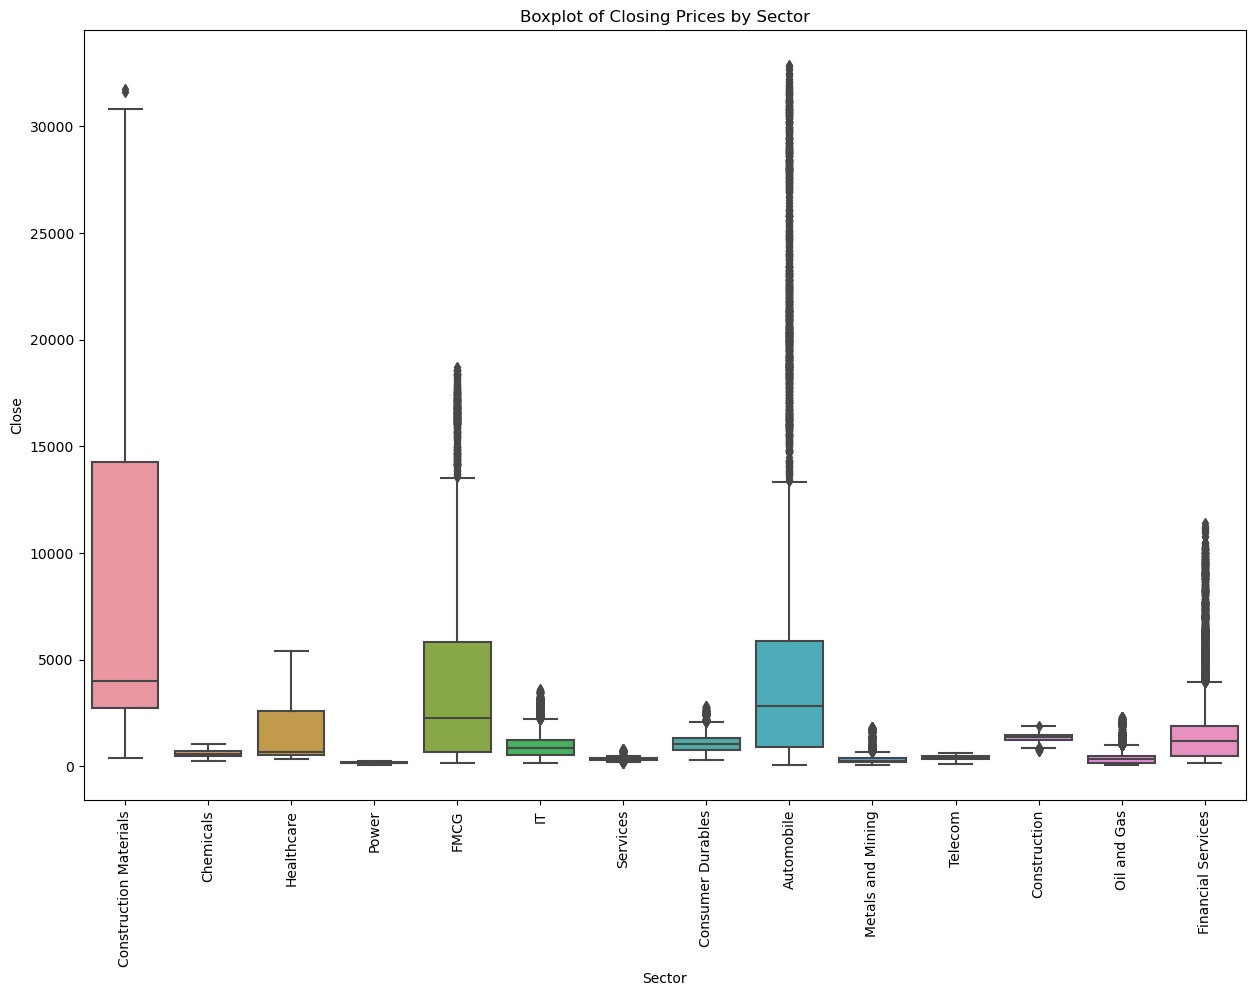

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot for each sector
plt.figure(figsize=(15, 10))
sns.boxplot(x='Sector', y='Close', data=df)
plt.xticks(rotation=90)
plt.title('Boxplot of Closing Prices by Sector')
plt.show()

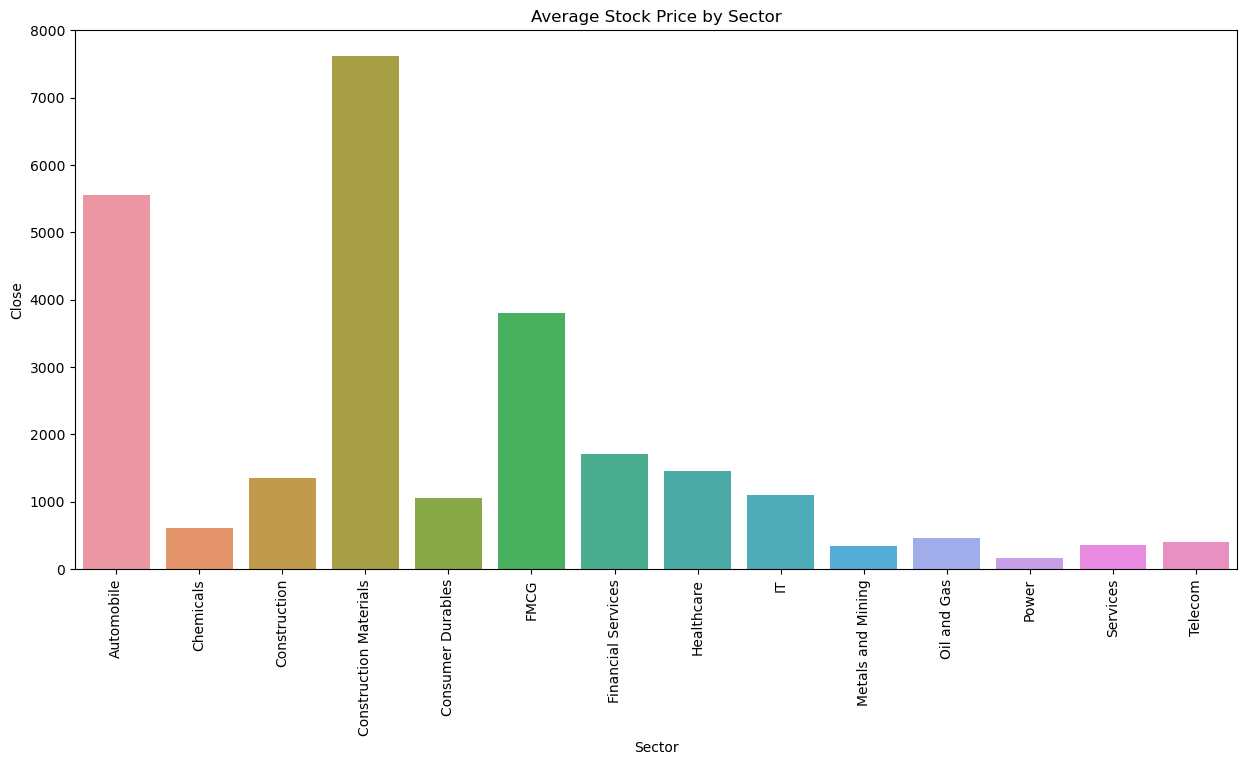

In [3]:
# Calculate average stock price by sector
avg_price_by_sector = df.groupby('Sector')['Close'].mean().reset_index()

# Plot average stock price by sector
plt.figure(figsize=(15, 7))
sns.barplot(x='Sector', y='Close', data=avg_price_by_sector)
plt.xticks(rotation=90)
plt.title('Average Stock Price by Sector')
plt.show()

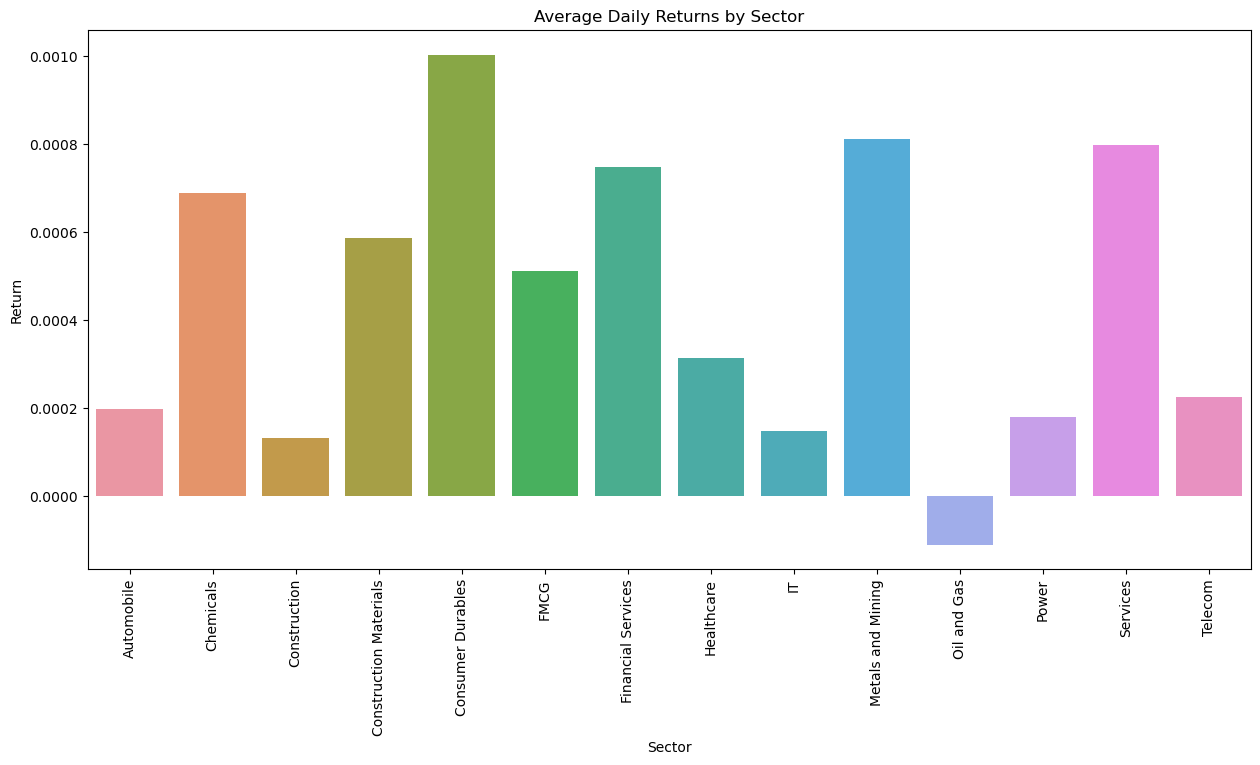

In [4]:
# Calculate daily returns
df['Return'] = df.groupby('Symbol')['Close'].pct_change()

# Calculate average returns by sector
avg_return_by_sector = df.groupby('Sector')['Return'].mean().reset_index()

# Plot average returns by sector
plt.figure(figsize=(15, 7))
sns.barplot(x='Sector', y='Return', data=avg_return_by_sector)
plt.xticks(rotation=90)
plt.title('Average Daily Returns by Sector')
plt.show()

In [5]:
# Calculate 50-day and 200-day rolling mean and standard deviations
df['50_MA'] = df.groupby('Symbol')['Close'].transform(lambda x: x.rolling(window=50).mean())
df['200_MA'] = df.groupby('Symbol')['Close'].transform(lambda x: x.rolling(window=200).mean())
df['50_SD'] = df.groupby('Symbol')['Close'].transform(lambda x: x.rolling(window=50).std())
df['200_SD'] = df.groupby('Symbol')['Close'].transform(lambda x: x.rolling(window=200).std())

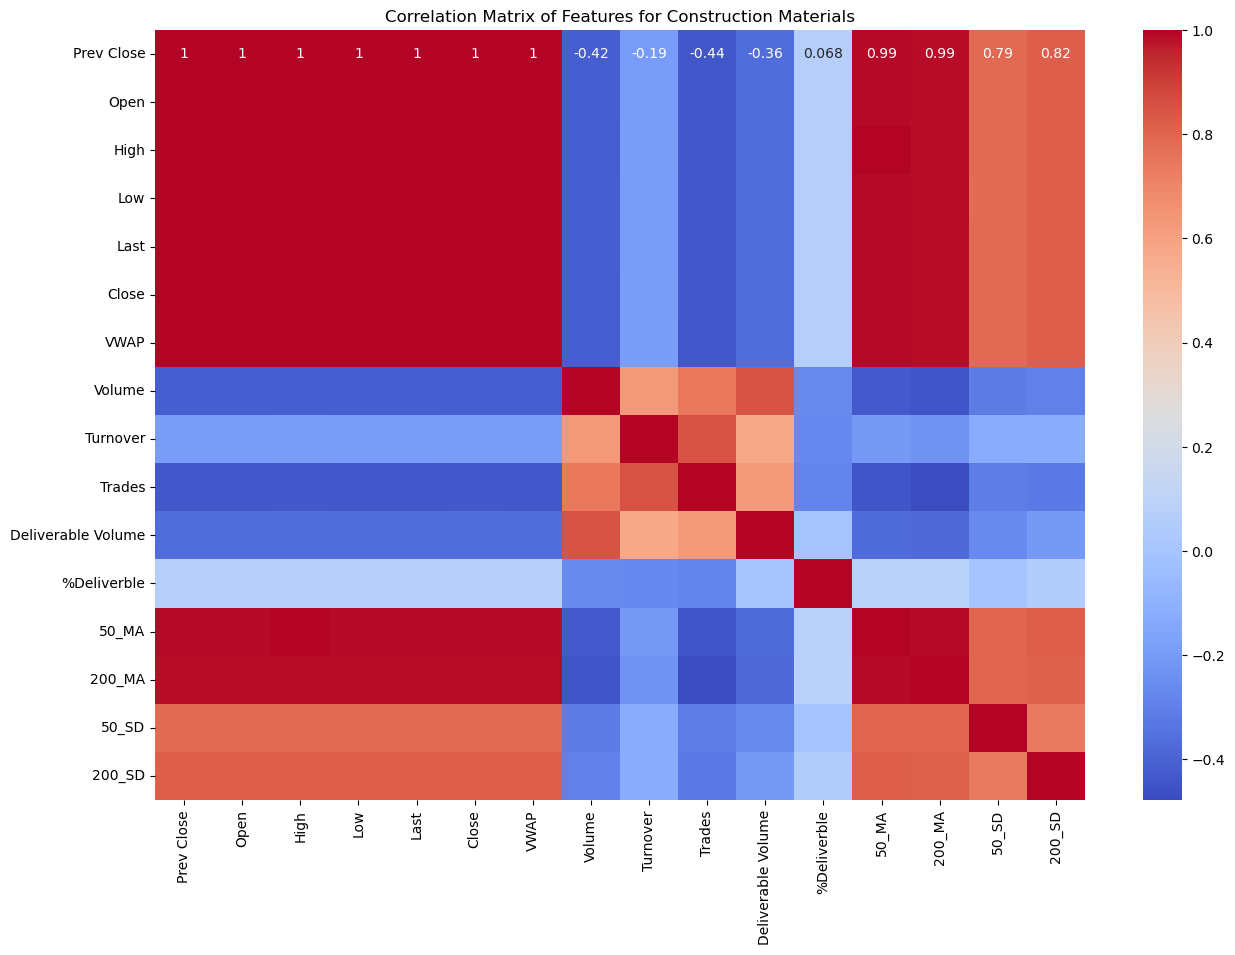

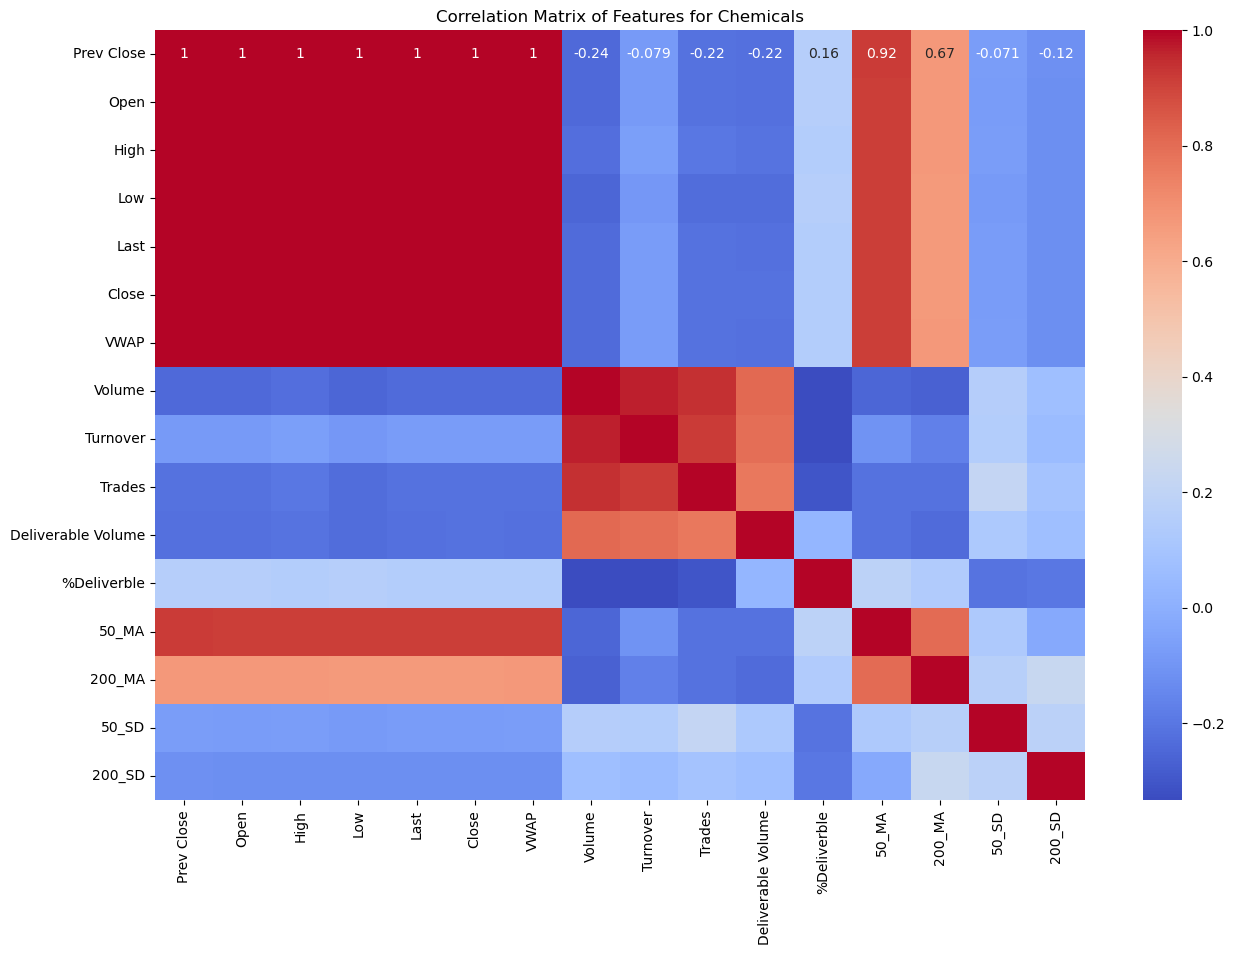

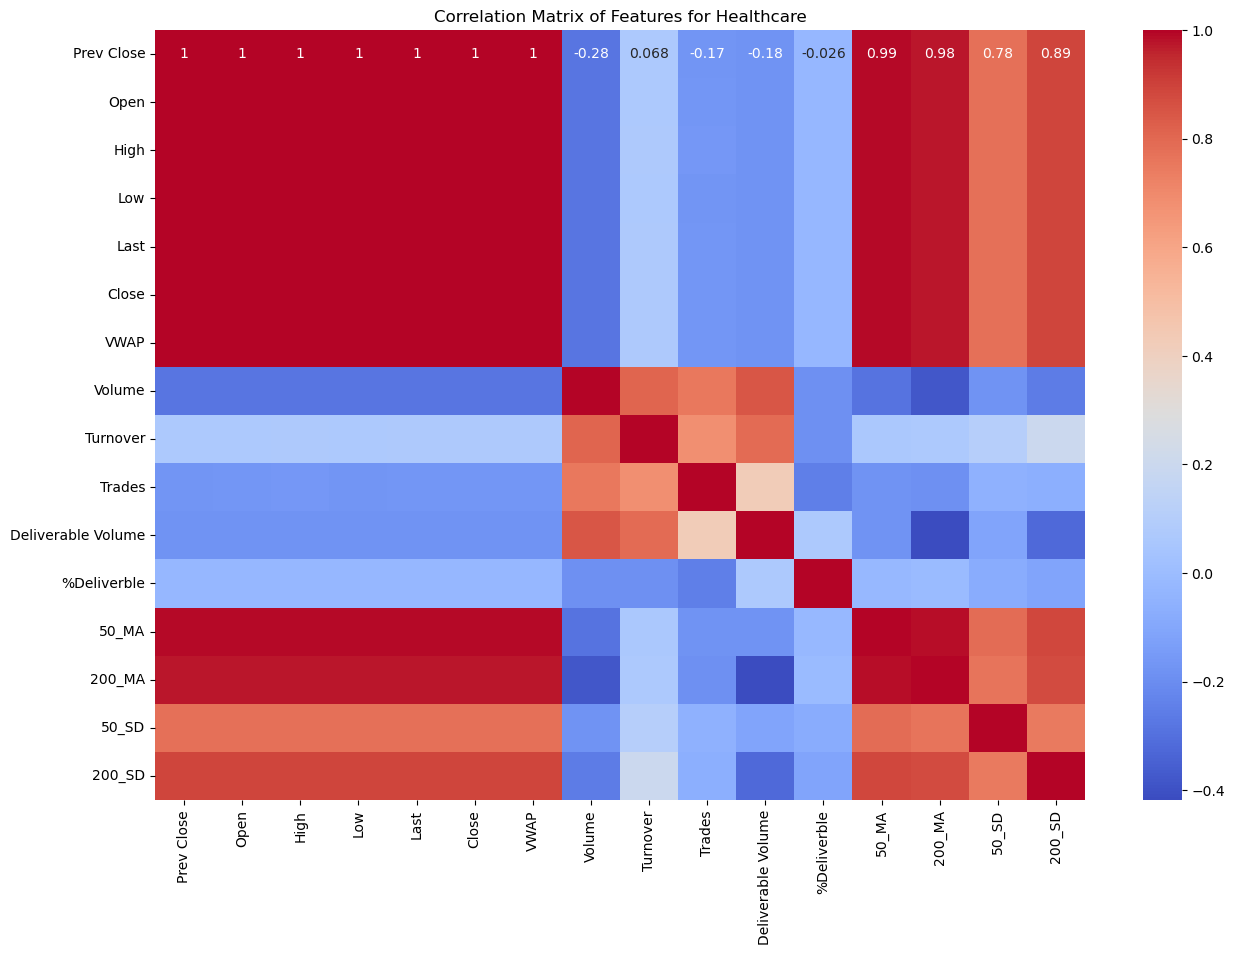

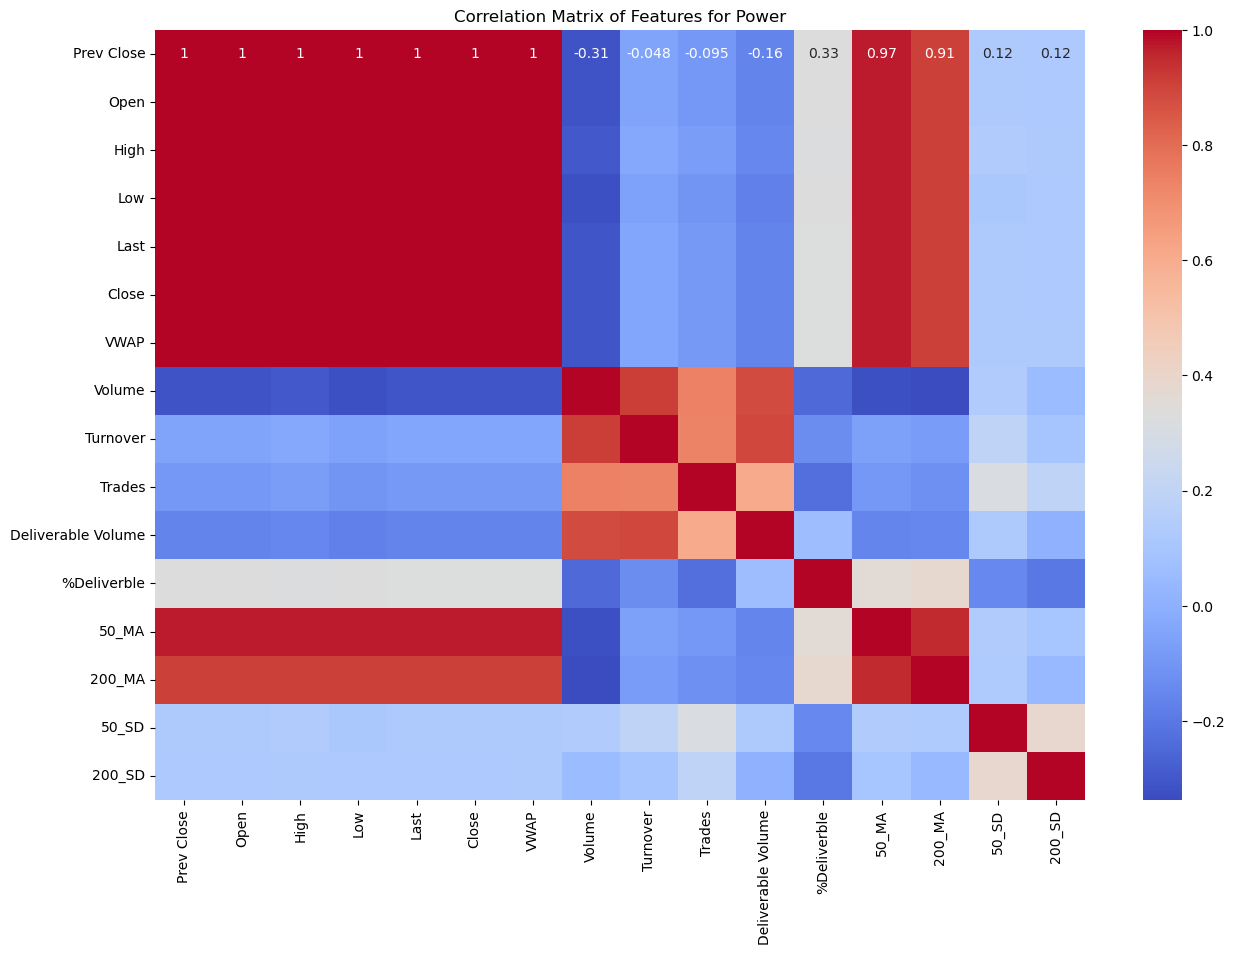

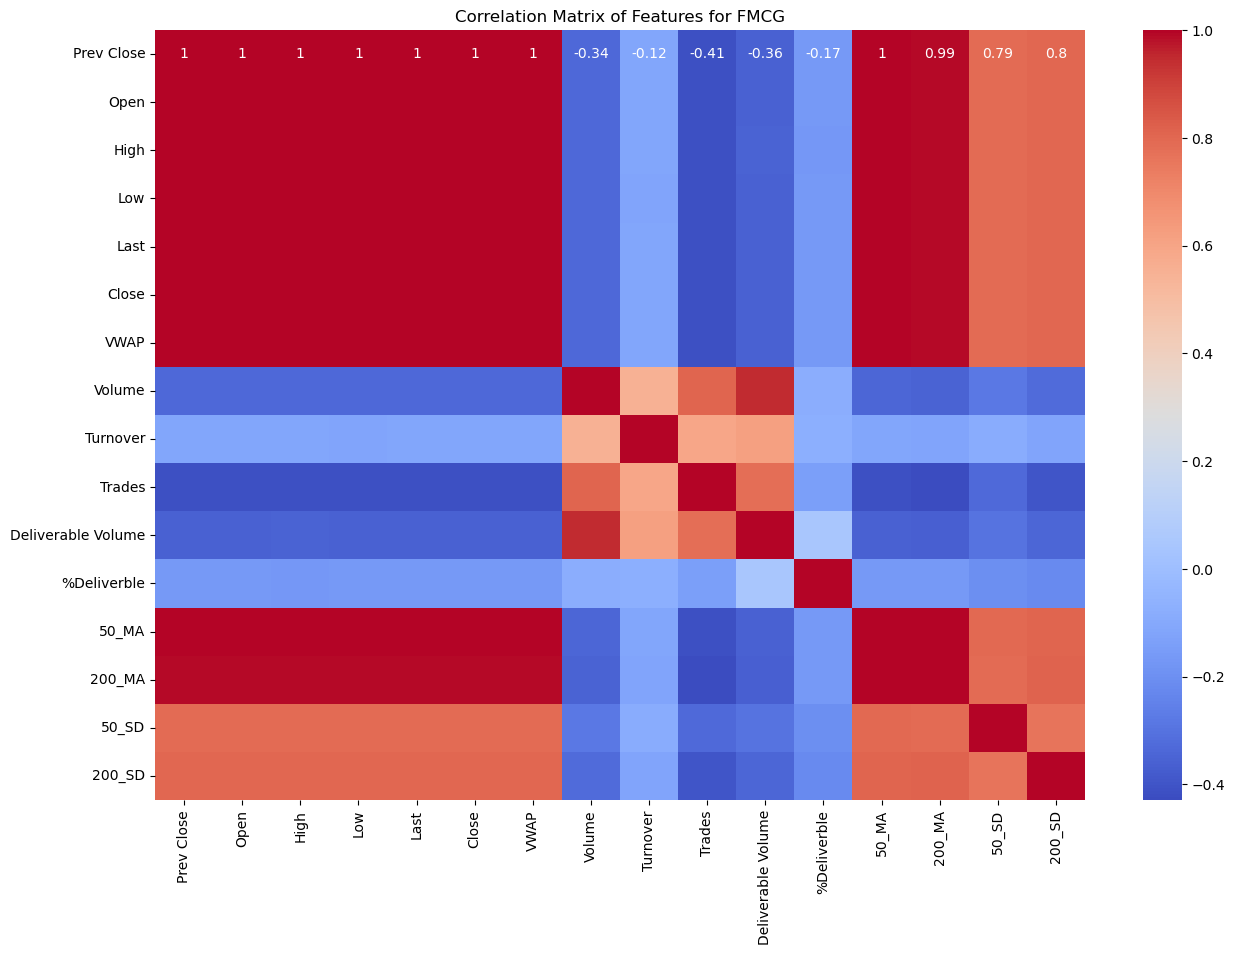

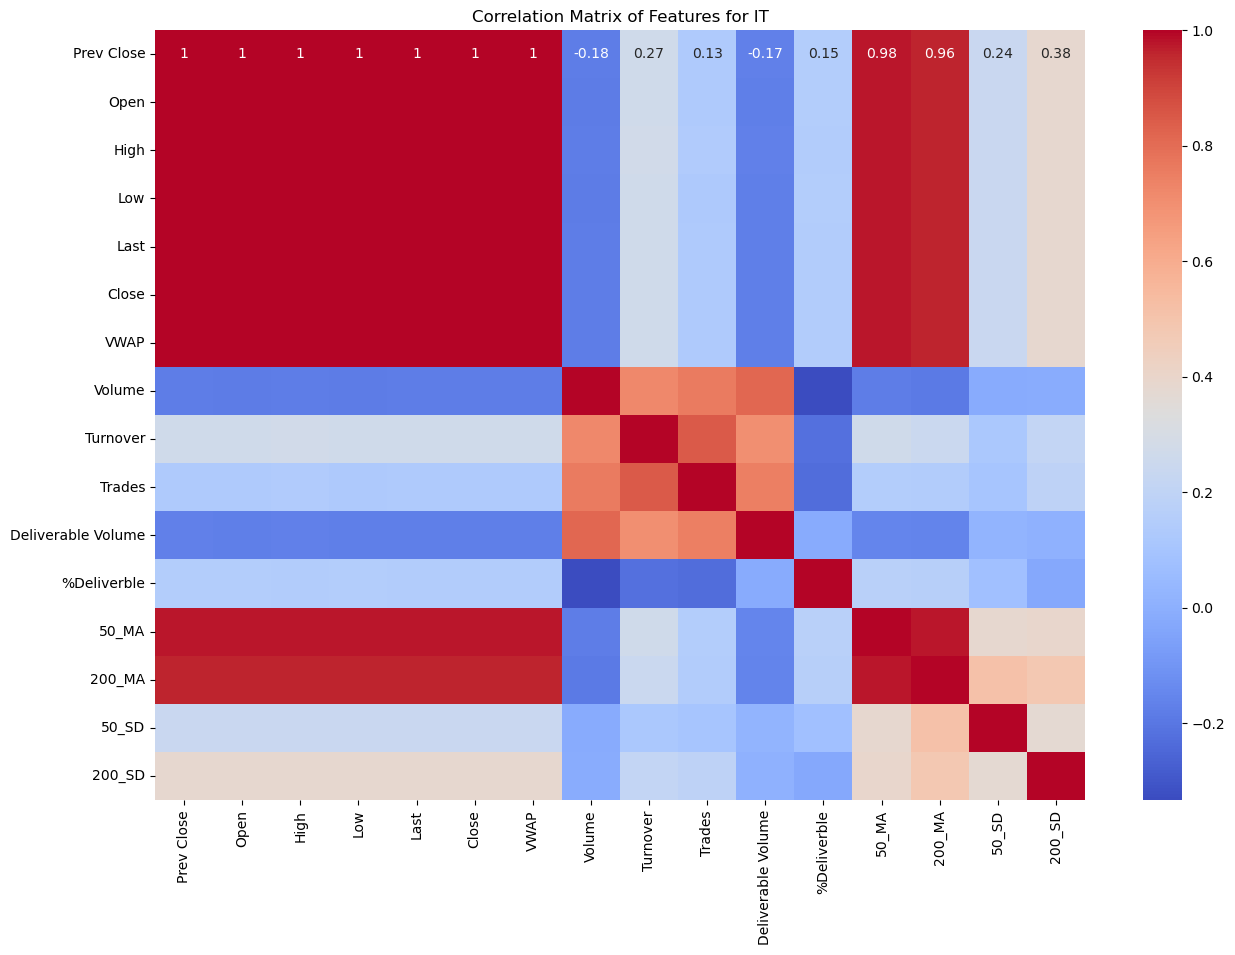

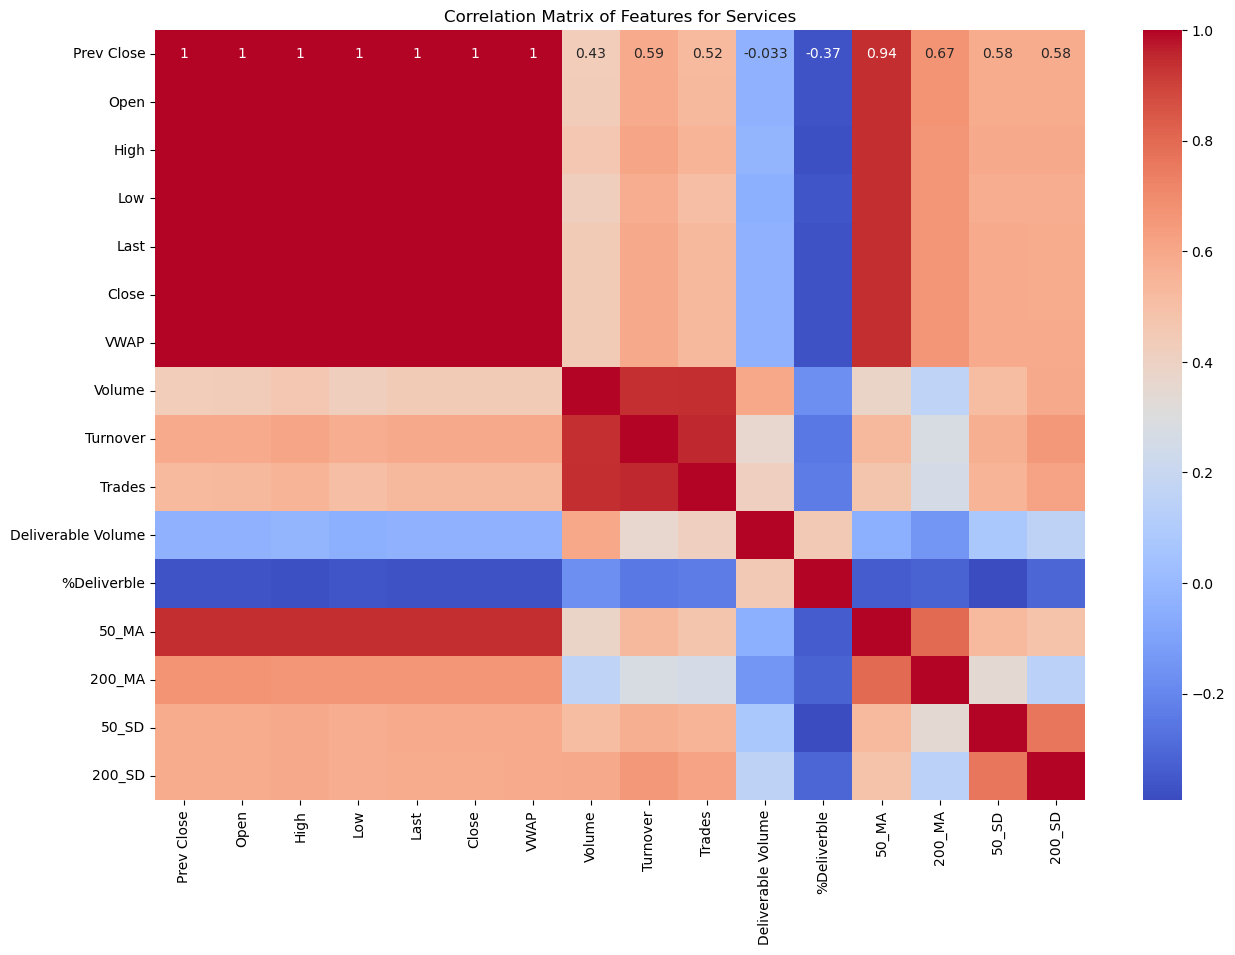

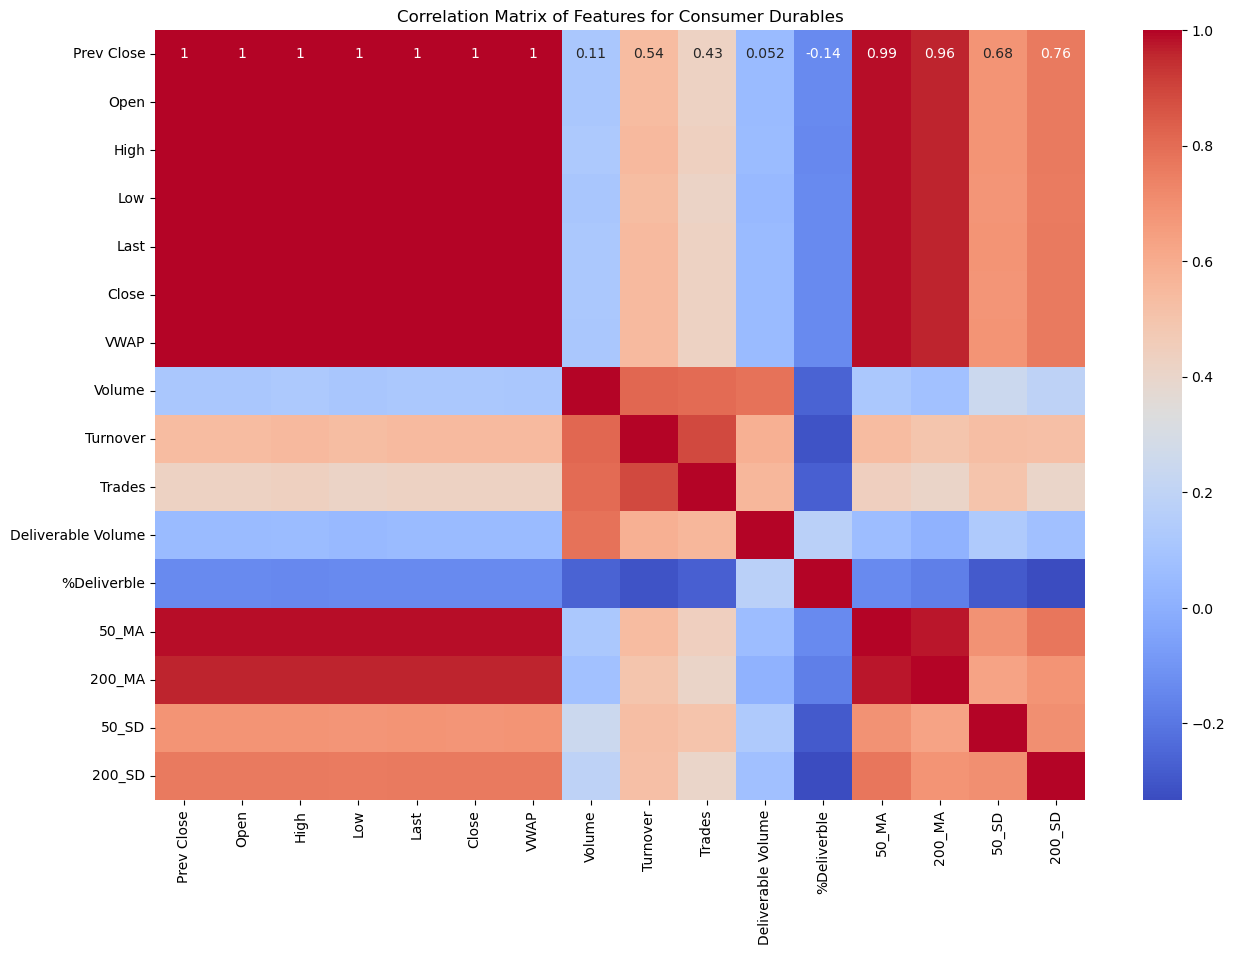

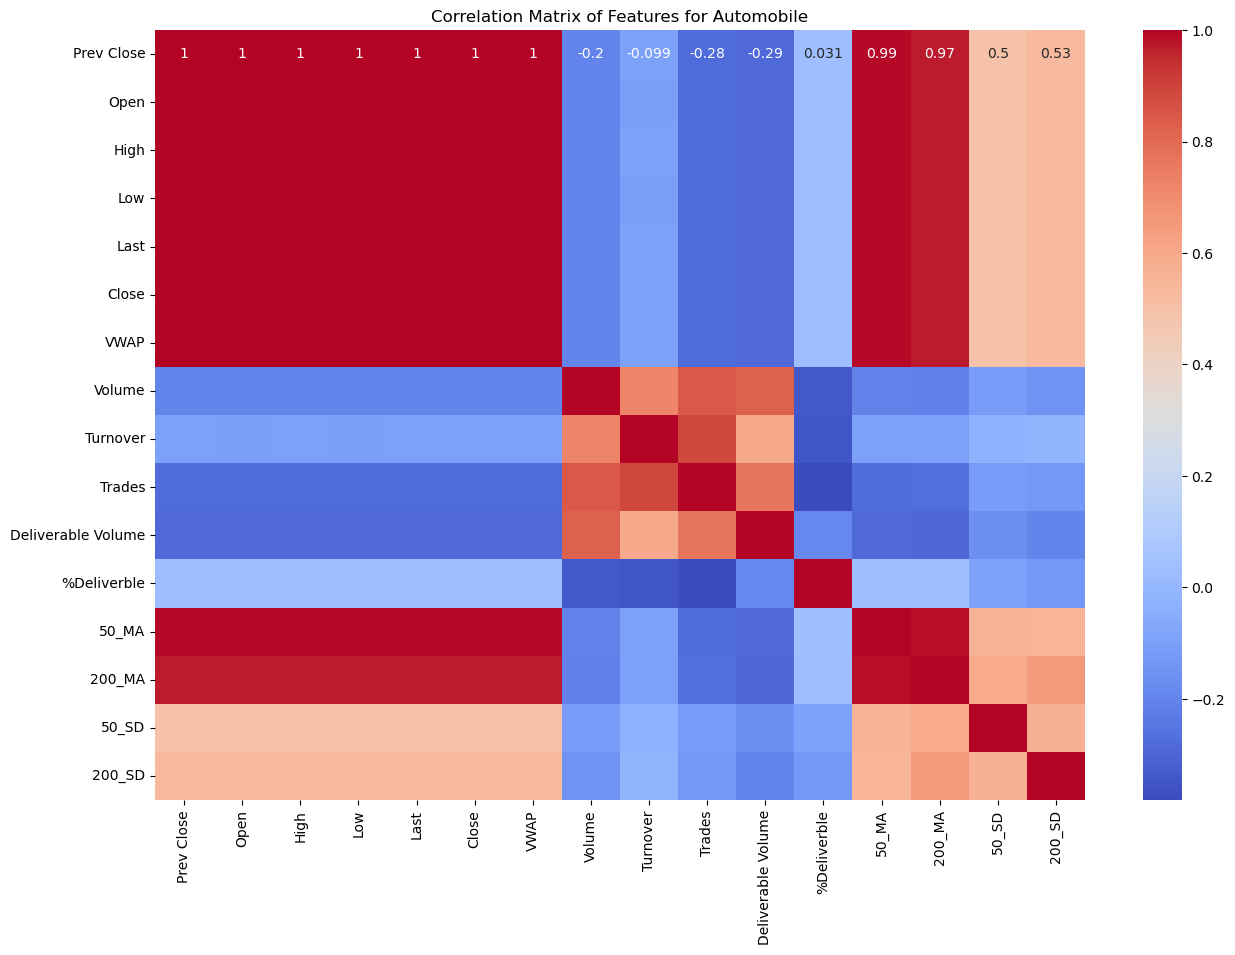

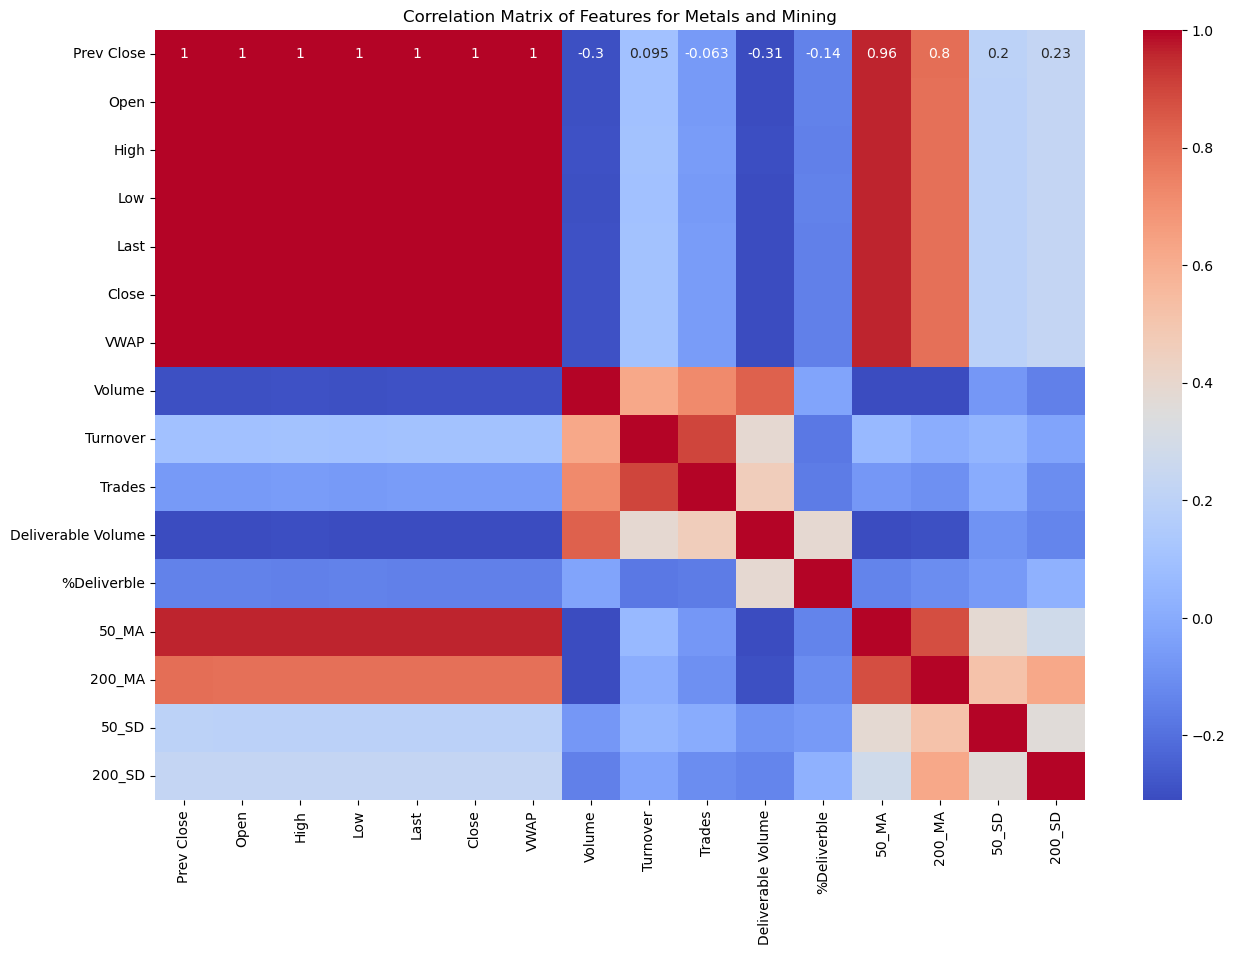

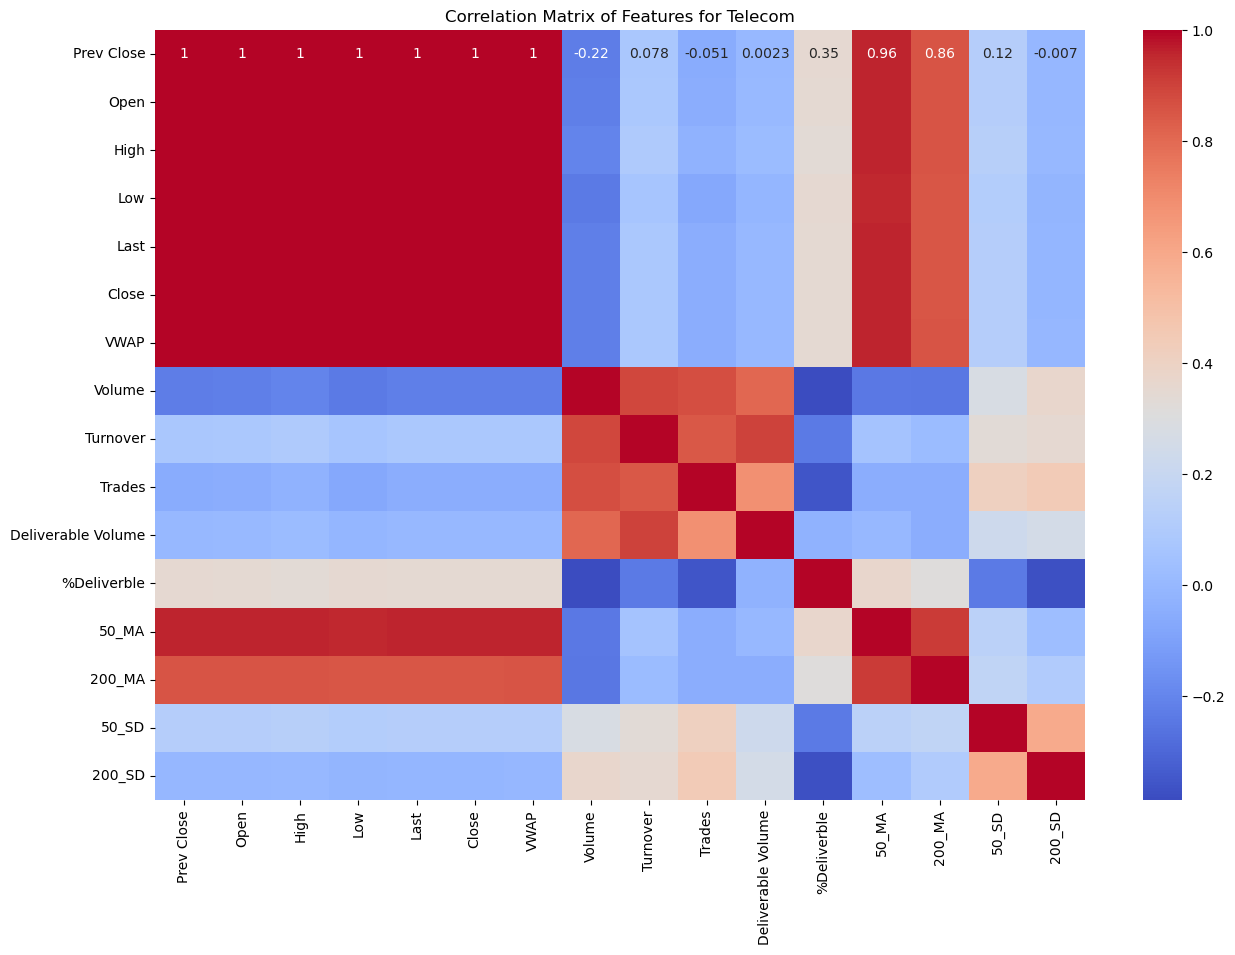

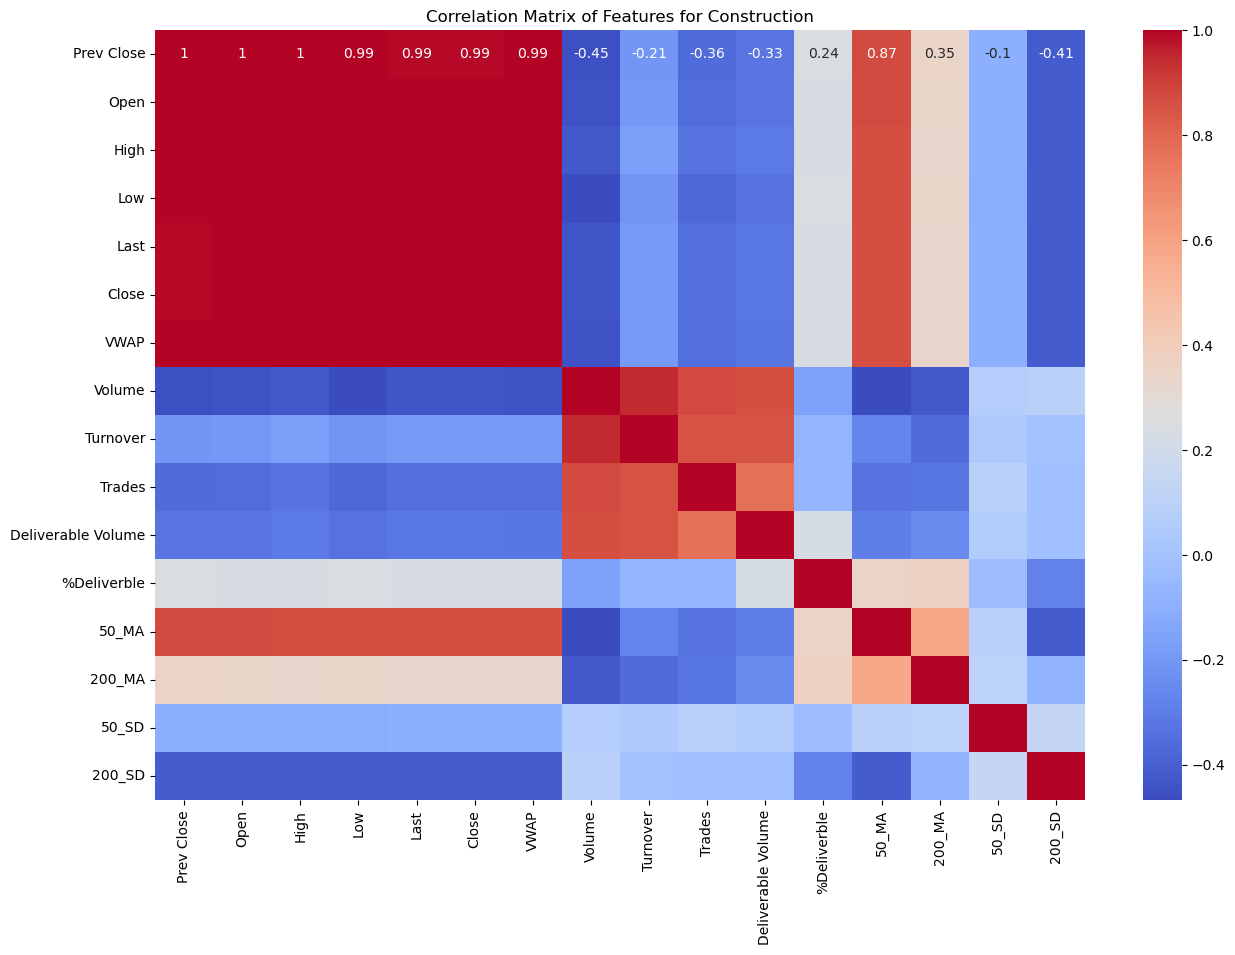

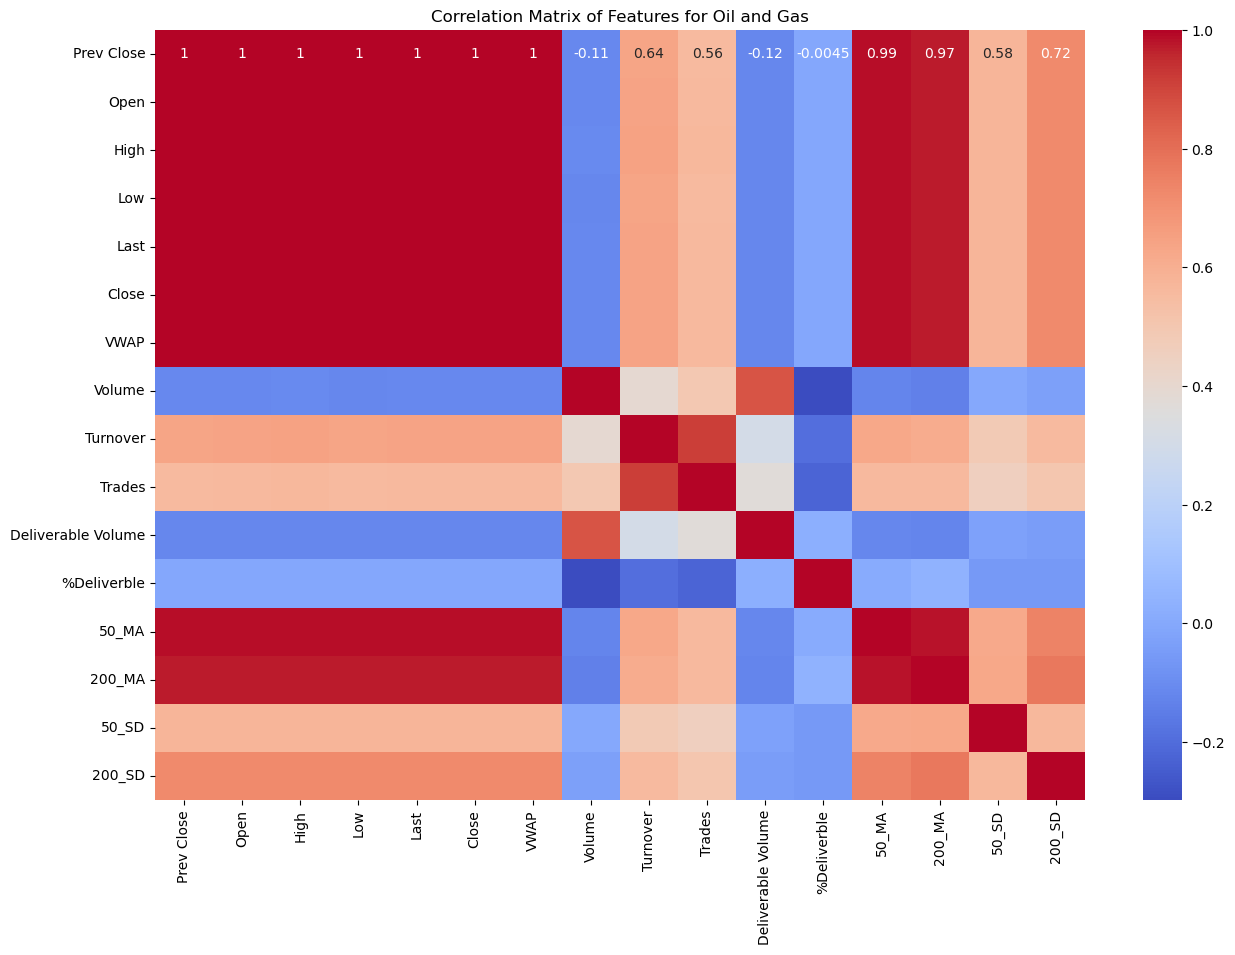

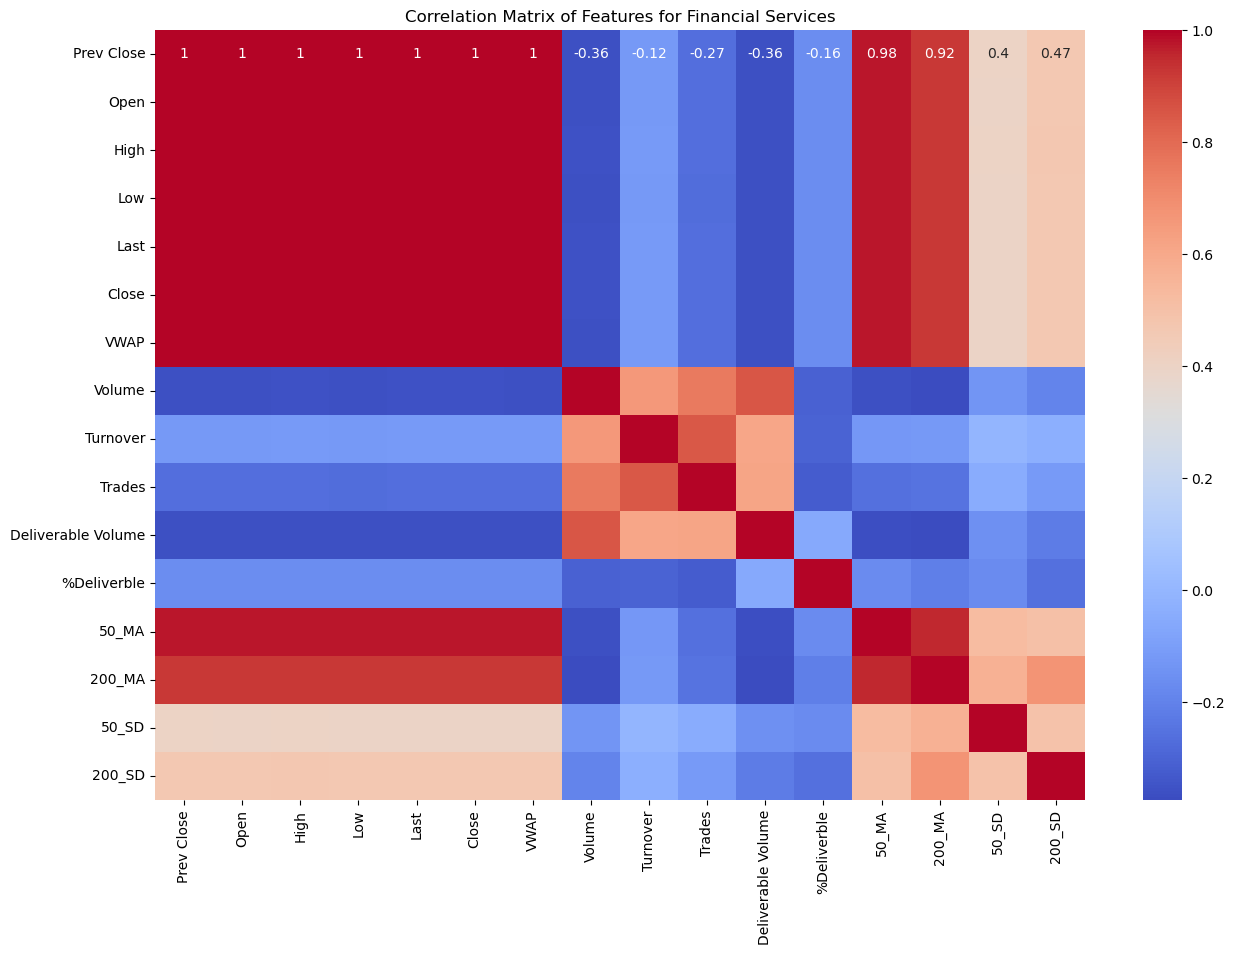

In [6]:
# List of features to analyze, including the new rolling mean and standard deviation features
features = ['Prev Close', 'Open', 'High', 'Low', 'Last', 'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume', '%Deliverble', '50_MA', '200_MA', '50_SD', '200_SD']
# Calculate correlation matrices for each sector
sectors = df['Sector'].unique()
correlation_matrices = {}

# Calculate and plot correlation matrix for each sector
for sector in sectors:
    sector_data = df[df['Sector'] == sector]
    correlation_matrix = sector_data[features].corr()
    correlation_matrices[sector] = correlation_matrix
    
    plt.figure(figsize=(15, 10))
    sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)
    plt.title(f'Correlation Matrix of Features for {sector}')
    plt.show()

In [7]:
# Store correlation matrices in DataFrames
correlation_dfs = {sector: correlation_matrices[sector] for sector in sectors}

# Display the correlation matrix for the 'Construction Materials' sector as an example
print(correlation_dfs['Financial Services'])

                    Prev Close      Open      High       Low      Last  \
Prev Close            1.000000  0.998847  0.998652  0.998600  0.998441   
Open                  0.998847  1.000000  0.999771  0.999759  0.999570   
High                  0.998652  0.999771  1.000000  0.999627  0.999812   
Low                   0.998600  0.999759  0.999627  1.000000  0.999761   
Last                  0.998441  0.999570  0.999812  0.999761  1.000000   
Close                 0.998456  0.999582  0.999819  0.999779  0.999992   
VWAP                  0.998657  0.999791  0.999899  0.999881  0.999916   
Volume               -0.359410 -0.359248 -0.357792 -0.360236 -0.358825   
Turnover             -0.117878 -0.117350 -0.113487 -0.119676 -0.115815   
Trades               -0.267510 -0.267333 -0.263977 -0.270380 -0.266752   
Deliverable Volume   -0.362329 -0.362278 -0.361317 -0.363000 -0.362051   
%Deliverble          -0.162000 -0.162178 -0.165002 -0.160419 -0.163356   
50_MA                 0.975986  0.9750

In [8]:
# Export correlation matrices to CSV files
for sector, correlation_matrix in correlation_matrices.items():
    filename = f'correlation_matrix_{sector.replace(" ", "_")}.csv'
    correlation_matrix.to_csv(f'~/Downloads/MPS DS Course Materials/DATA 606/sectoralstockanalysis/Correlation Data/{filename}')
    print(f'Correlation matrix for {sector} saved to {filename}')

Correlation matrix for Construction Materials saved to correlation_matrix_Construction_Materials.csv
Correlation matrix for Chemicals saved to correlation_matrix_Chemicals.csv
Correlation matrix for Healthcare saved to correlation_matrix_Healthcare.csv
Correlation matrix for Power saved to correlation_matrix_Power.csv
Correlation matrix for FMCG saved to correlation_matrix_FMCG.csv
Correlation matrix for IT saved to correlation_matrix_IT.csv
Correlation matrix for Services saved to correlation_matrix_Services.csv
Correlation matrix for Consumer Durables saved to correlation_matrix_Consumer_Durables.csv
Correlation matrix for Automobile saved to correlation_matrix_Automobile.csv
Correlation matrix for Metals and Mining saved to correlation_matrix_Metals_and_Mining.csv
Correlation matrix for Telecom saved to correlation_matrix_Telecom.csv
Correlation matrix for Construction saved to correlation_matrix_Construction.csv
Correlation matrix for Oil and Gas saved to correlation_matrix_Oil_and

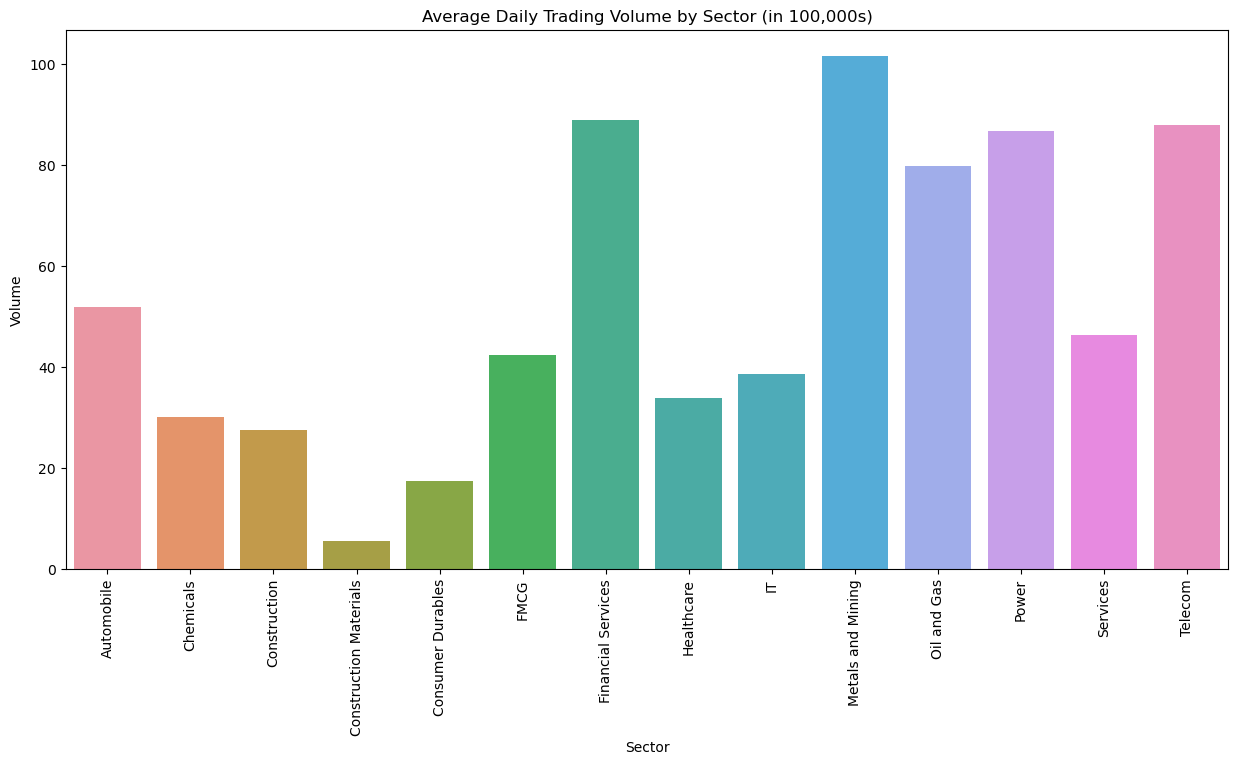

In [9]:
# Convert volume to a readable scale (e.g., divide by 100000)
df['Volume'] = df['Volume'] / 100000

# Calculate average trading volume by sector
avg_volume_by_sector = df.groupby('Sector')['Volume'].mean().reset_index()

# Plot average trading volume by sector
plt.figure(figsize=(15, 7))
sns.barplot(x='Sector', y='Volume', data=avg_volume_by_sector)
plt.xticks(rotation=90)
plt.title('Average Daily Trading Volume by Sector (in 100,000s)')
plt.show()

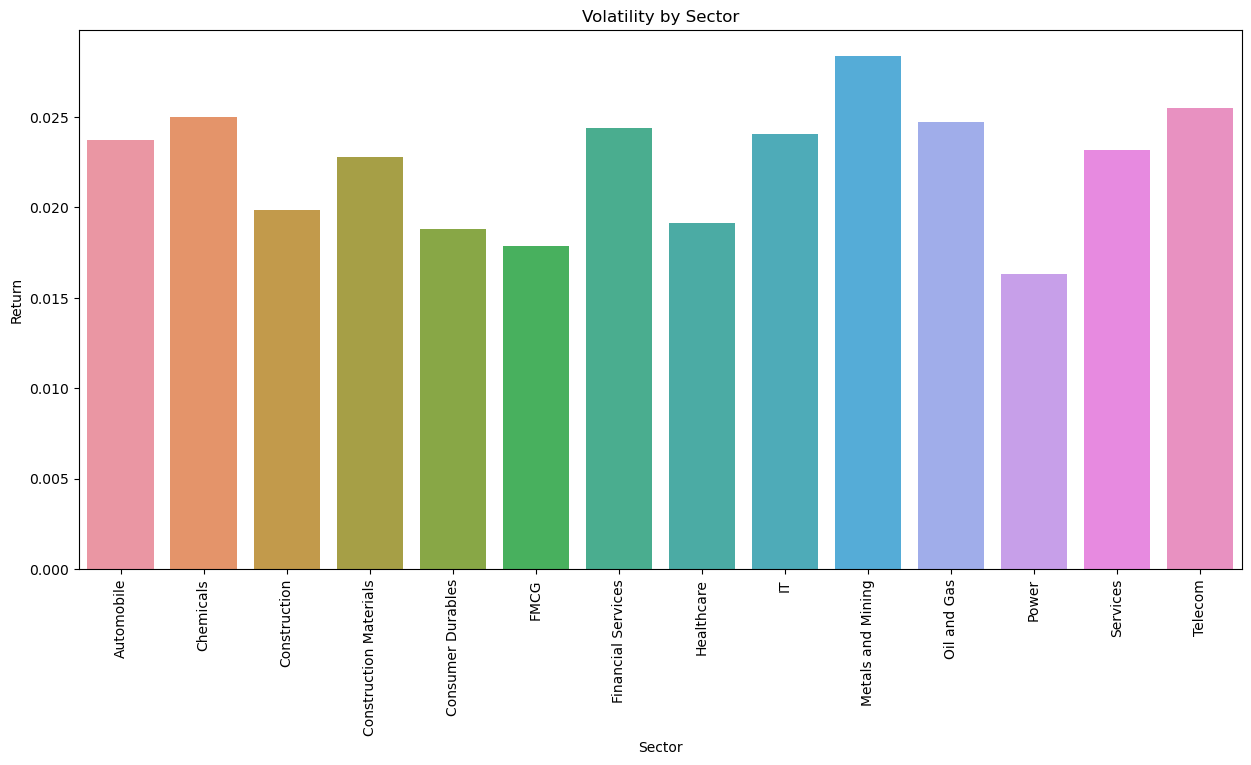

In [10]:
# Calculate volatility by sector
volatility_by_sector = df.groupby('Sector')['Return'].std().reset_index()

# Plot volatility by sector
plt.figure(figsize=(15, 7))
sns.barplot(x='Sector', y='Return', data=volatility_by_sector)
plt.xticks(rotation=90)
plt.title('Volatility by Sector')
plt.show()

A histogram or density plot can show the distribution of stock prices within each sector, helping to understand the spread and central tendency.

/home/rohan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


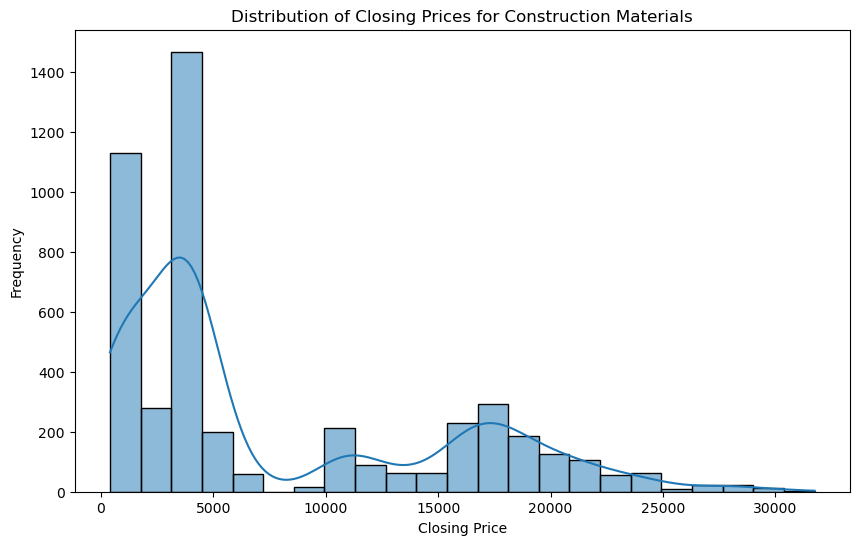

/home/rohan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


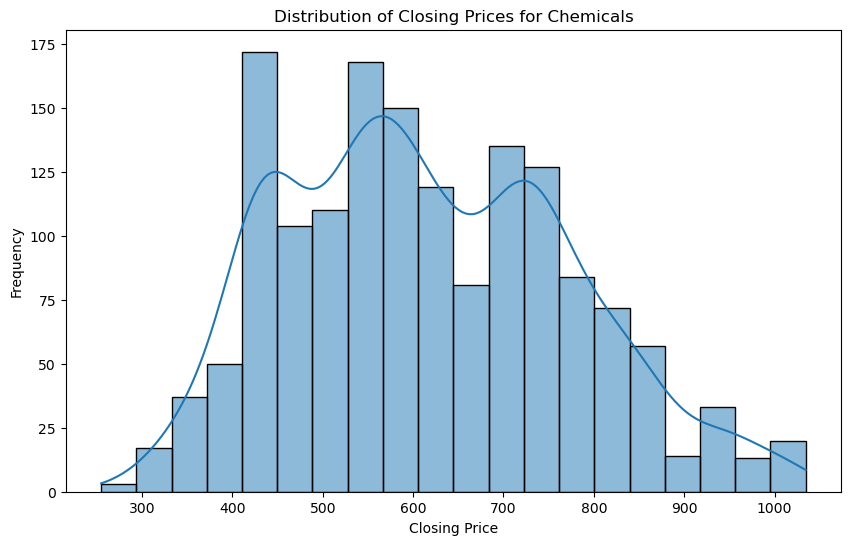

/home/rohan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


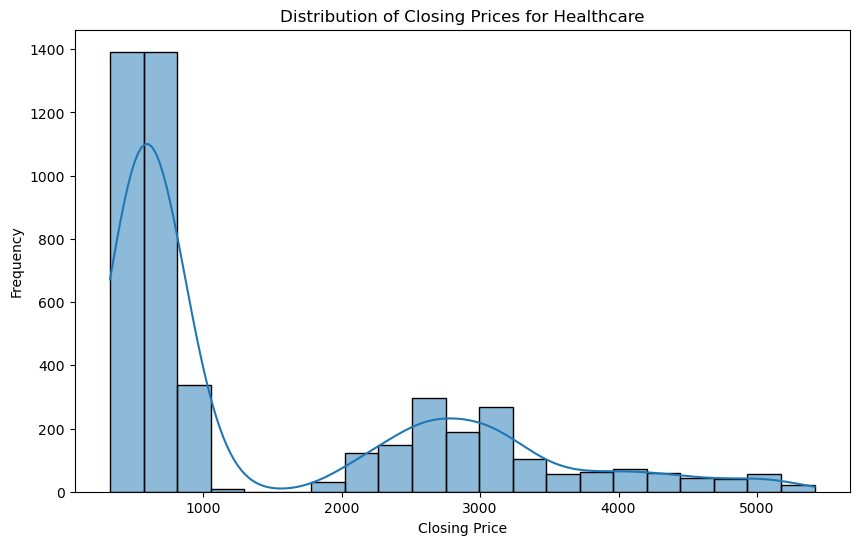

/home/rohan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


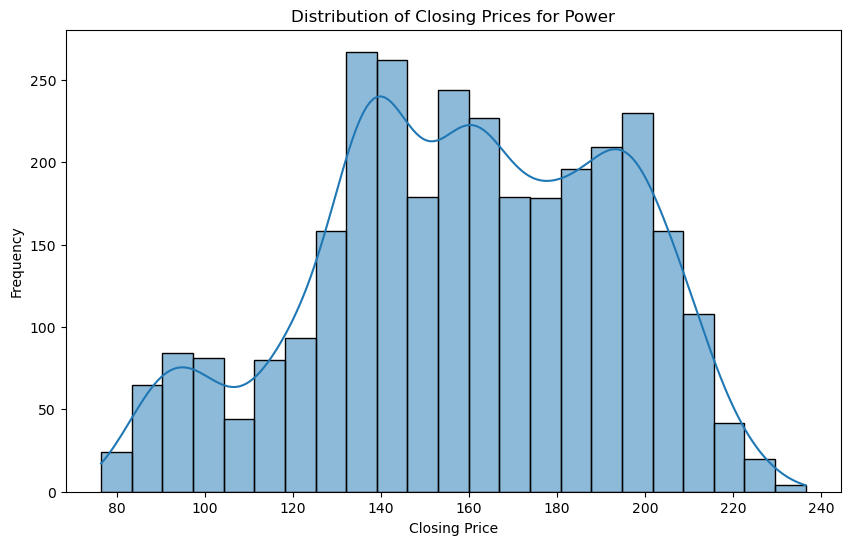

/home/rohan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


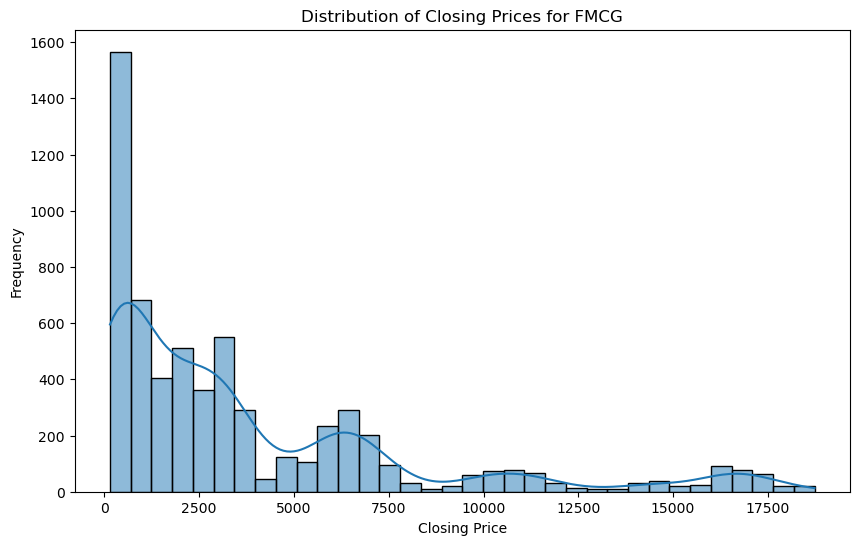

/home/rohan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


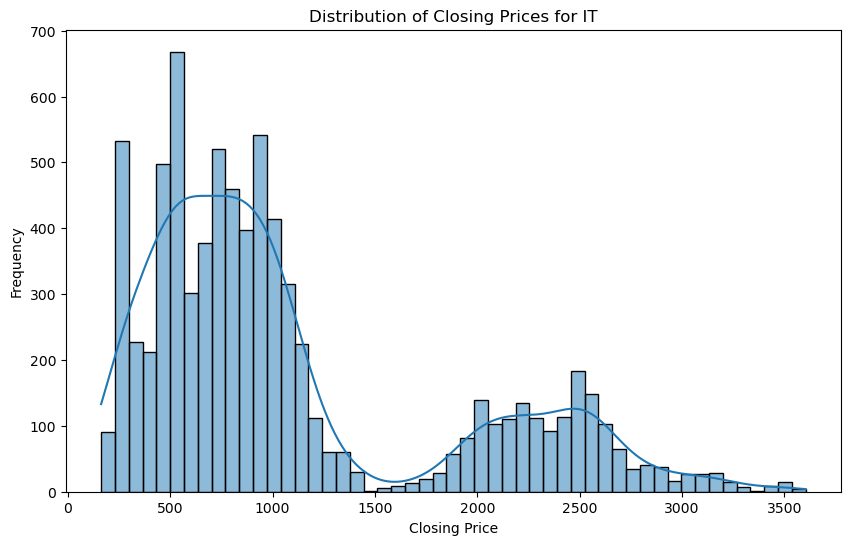

/home/rohan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


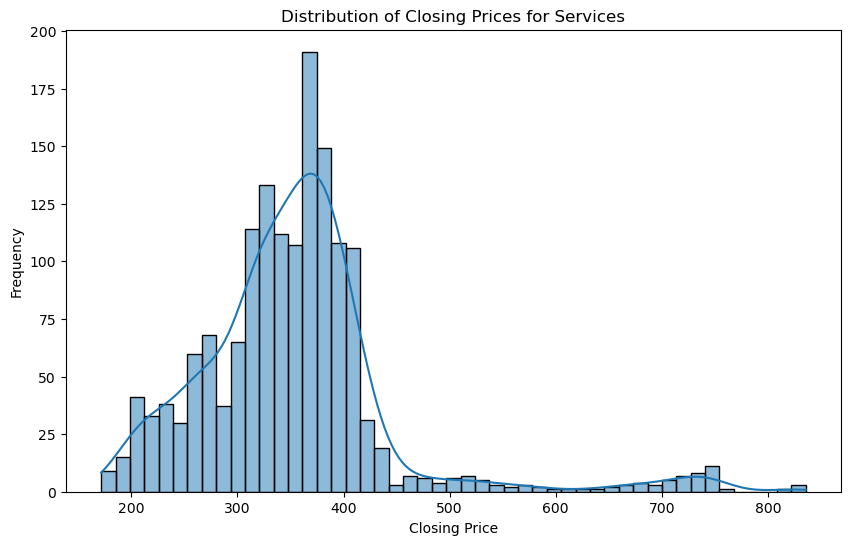

/home/rohan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


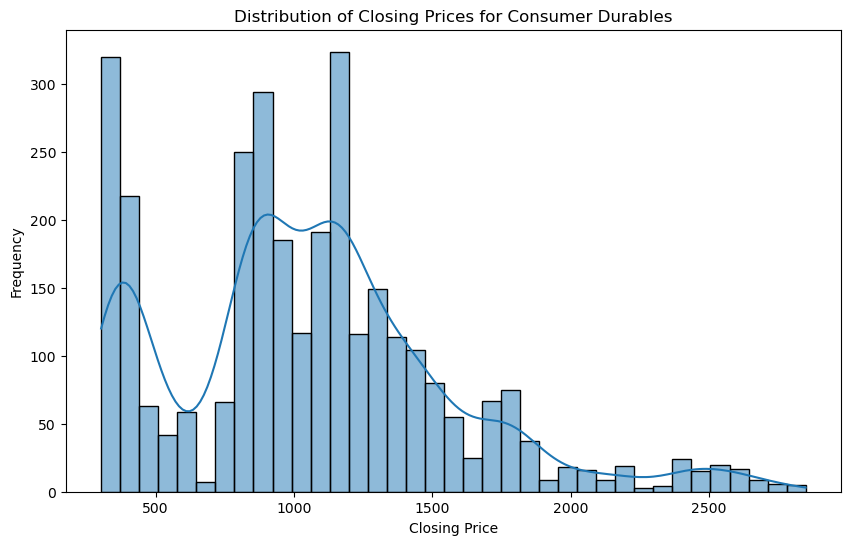

/home/rohan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


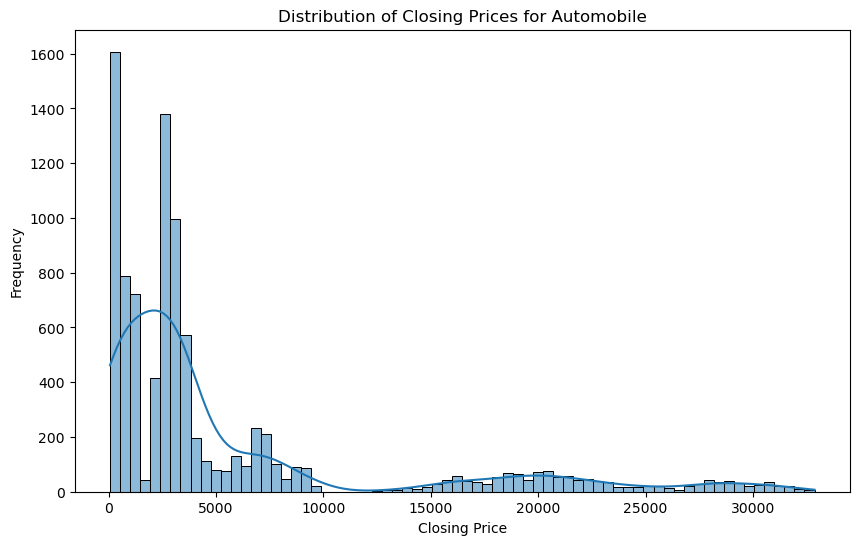

/home/rohan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


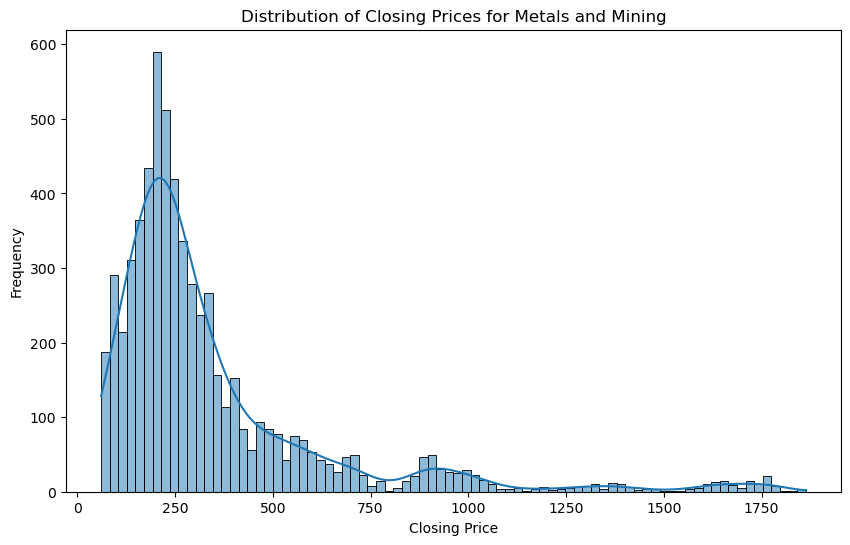

/home/rohan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


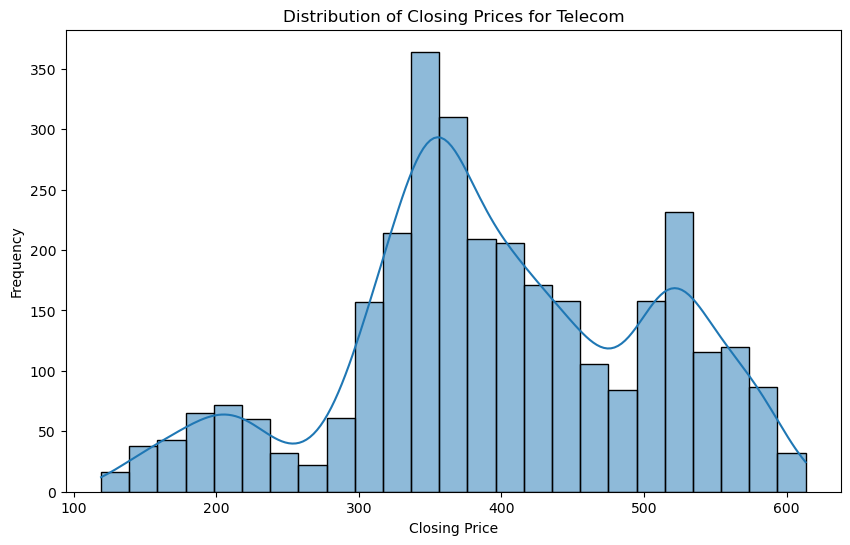

/home/rohan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


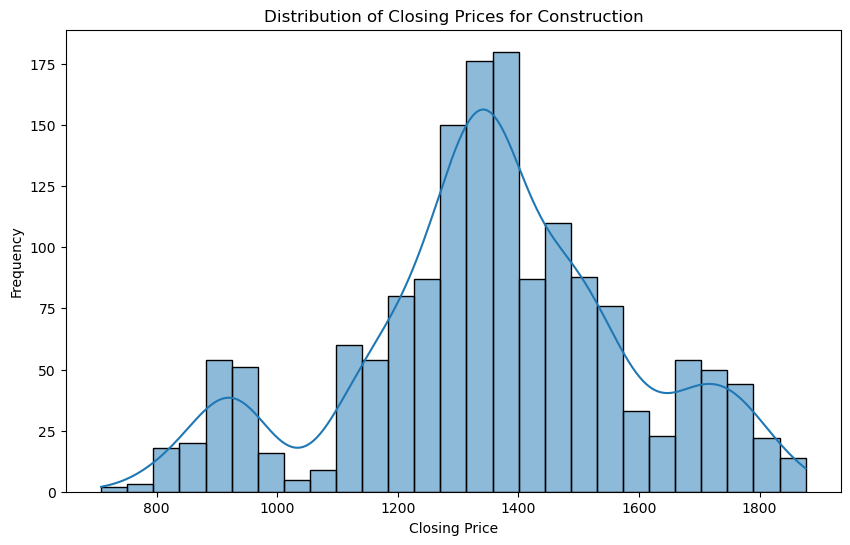

/home/rohan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


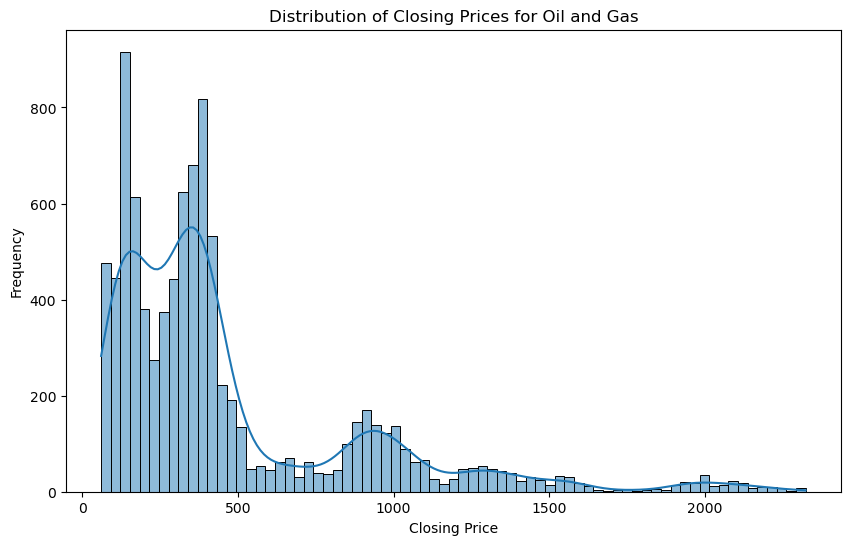

/home/rohan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


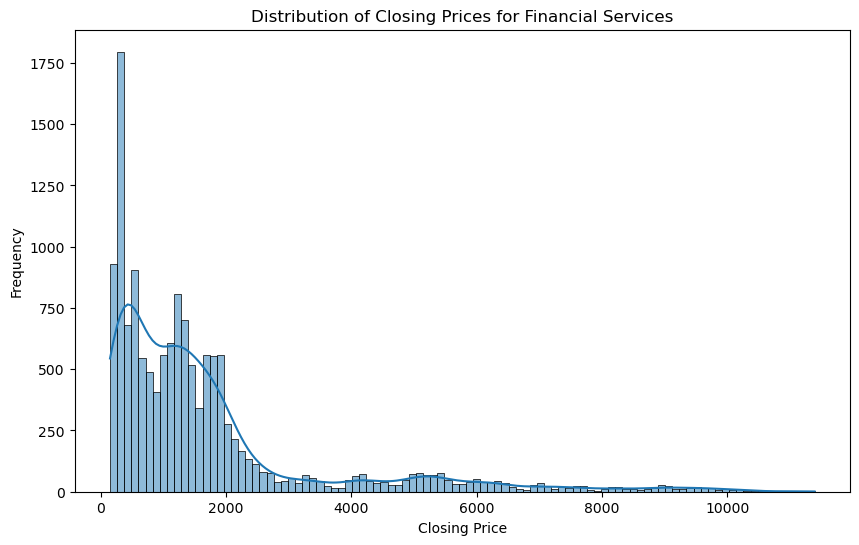

In [12]:
# Plot histograms for each sector
sectors = df['Sector'].unique()
for sector in sectors:
    sector_data = df[df['Sector'] == sector]
    plt.figure(figsize=(10, 6))
    sns.histplot(sector_data['Close'], kde=True)
    plt.title(f'Distribution of Closing Prices for {sector}')
    plt.xlabel('Closing Price')
    plt.ylabel('Frequency')
    plt.show()

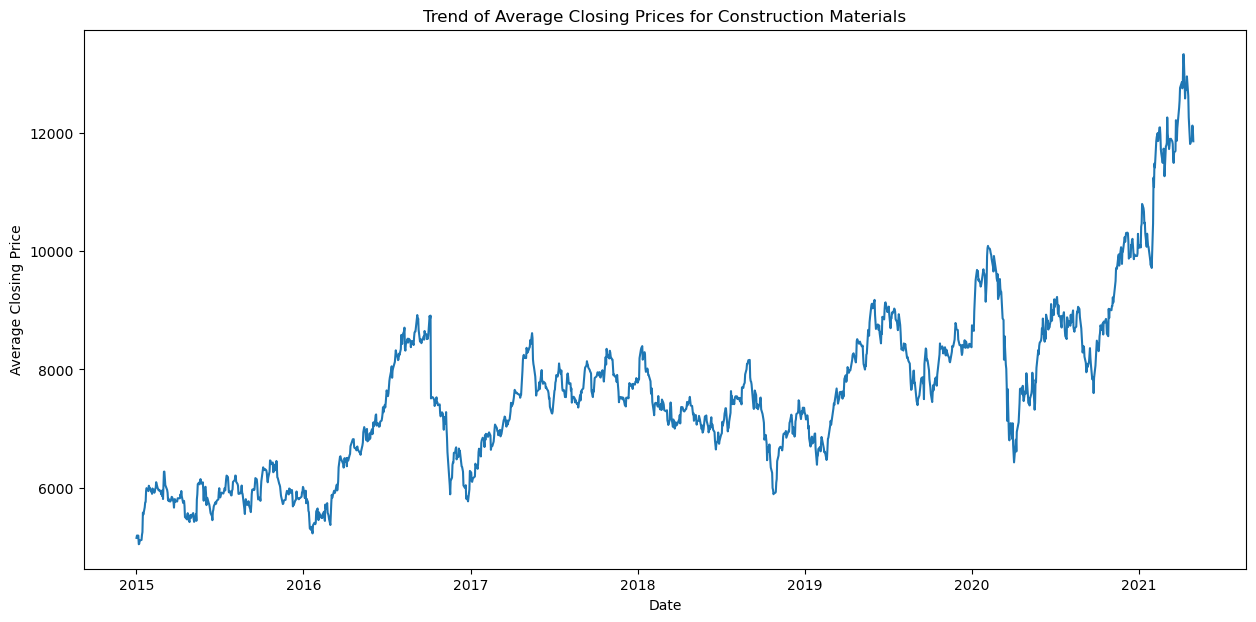

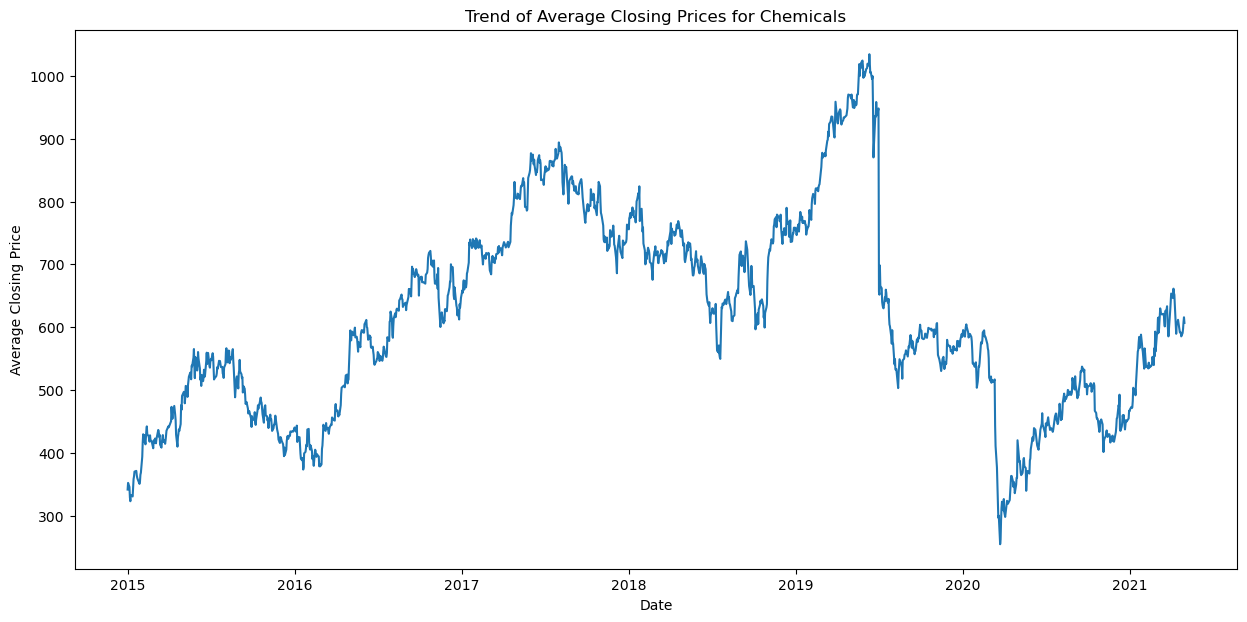

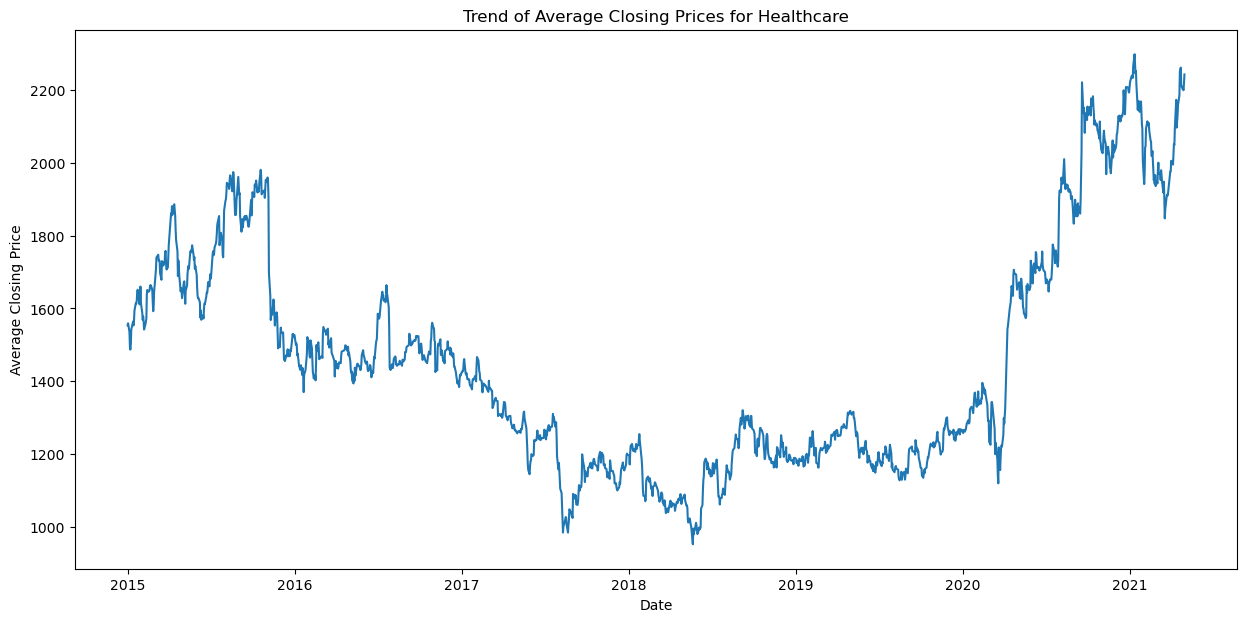

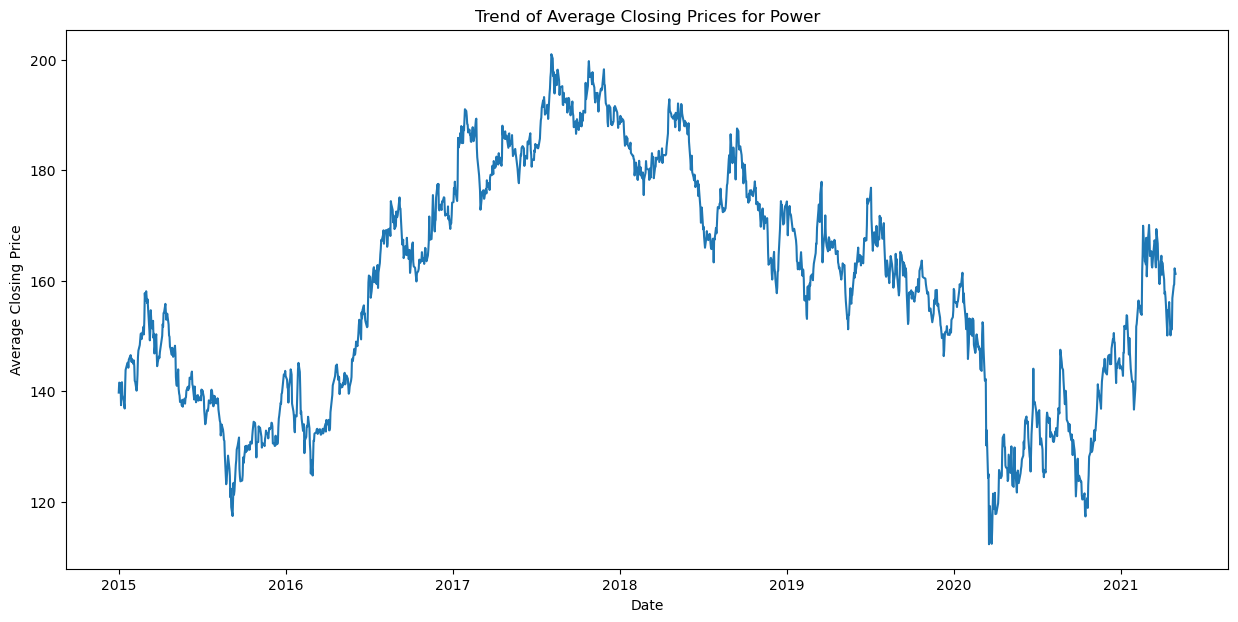

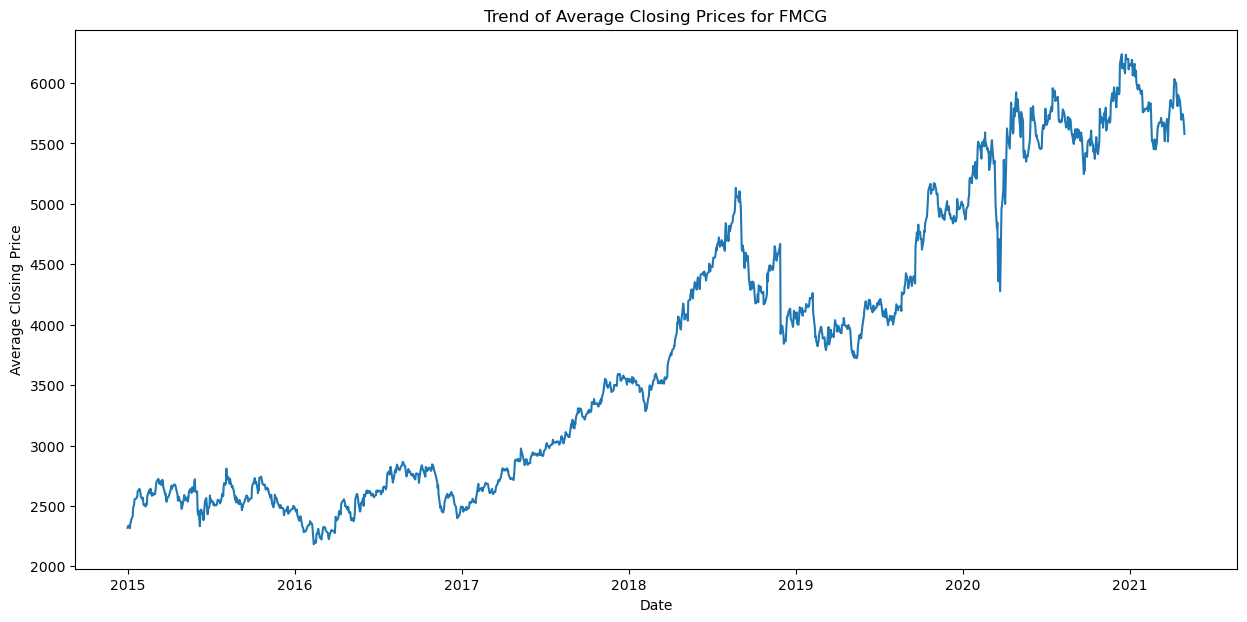

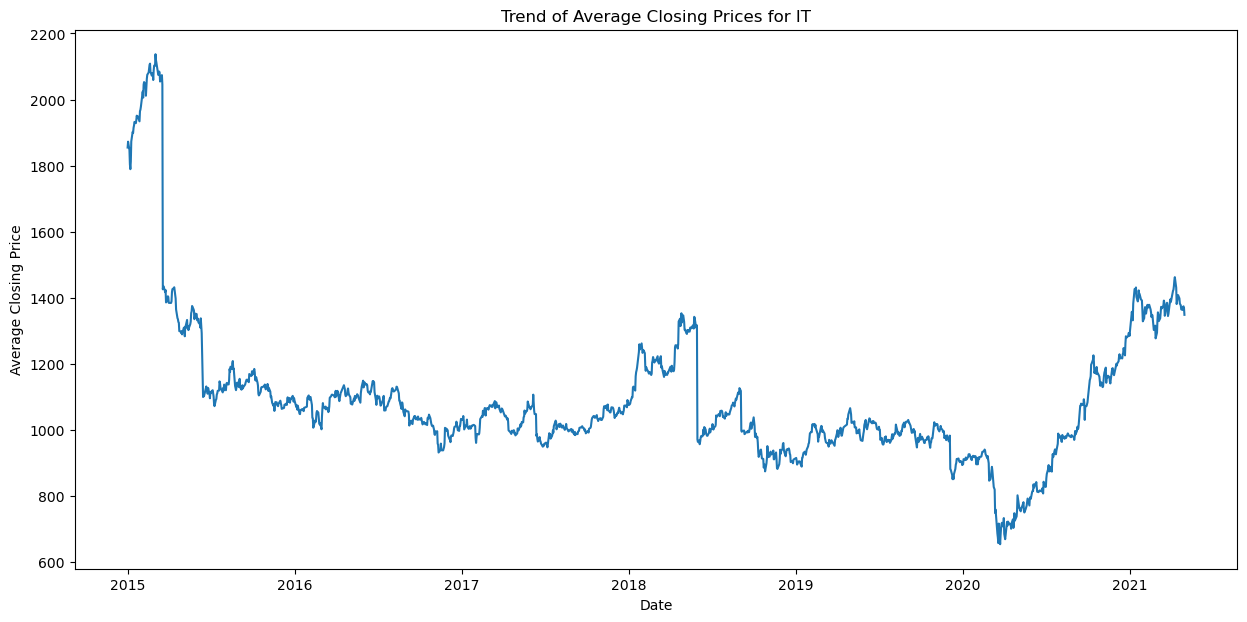

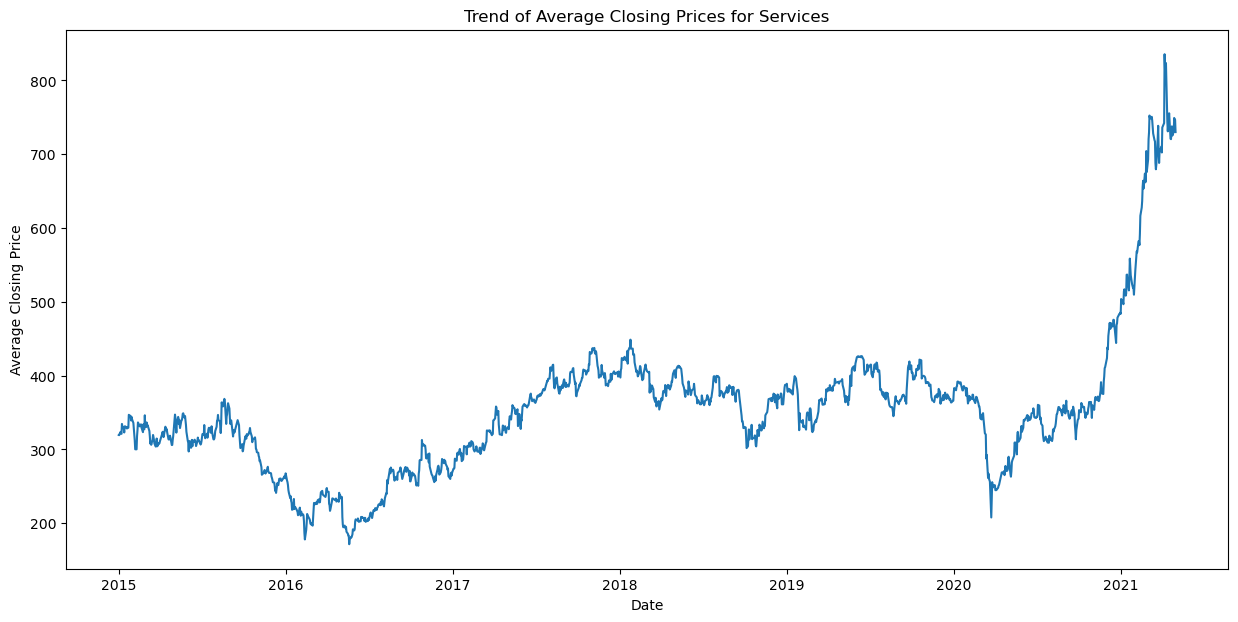

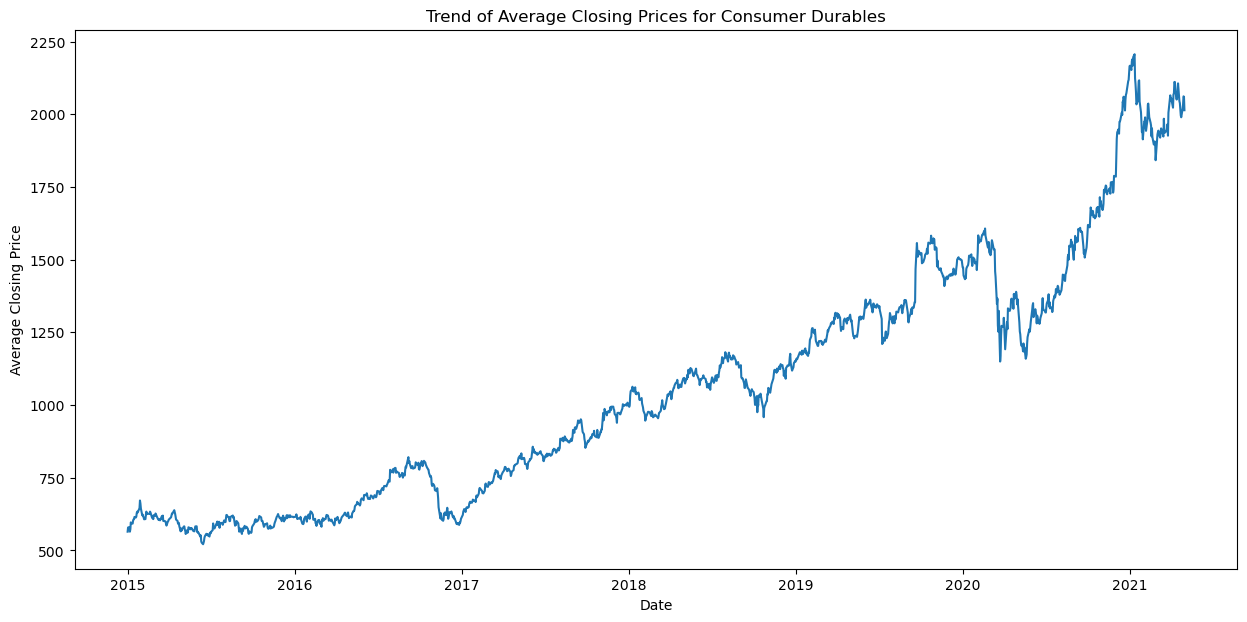

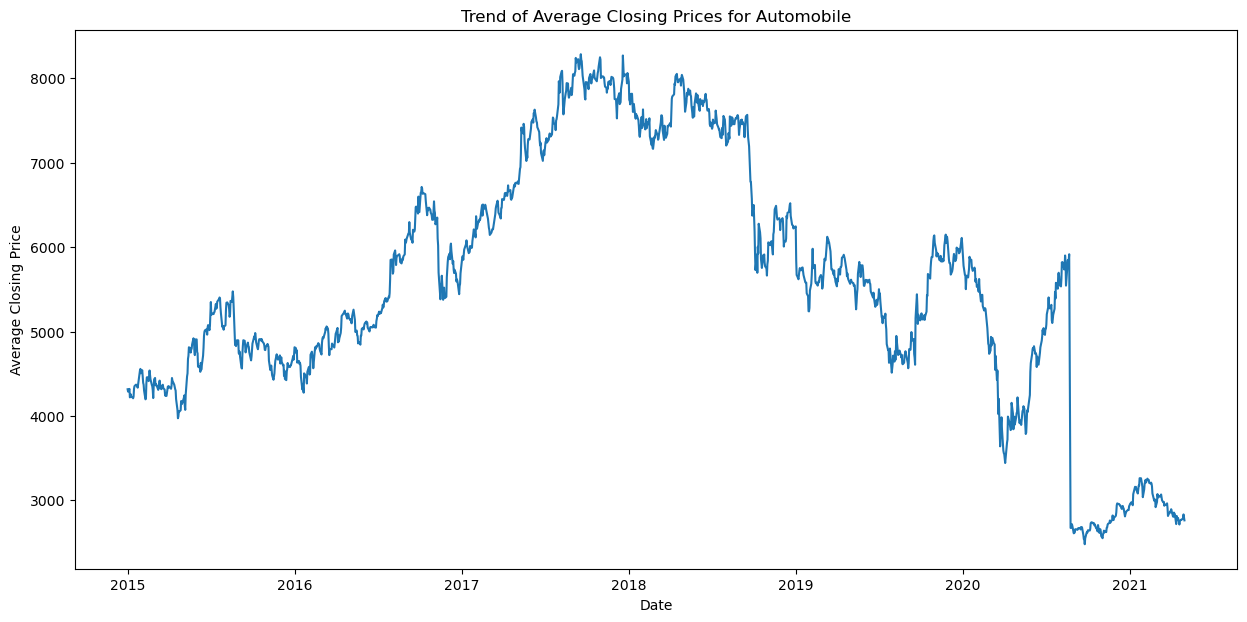

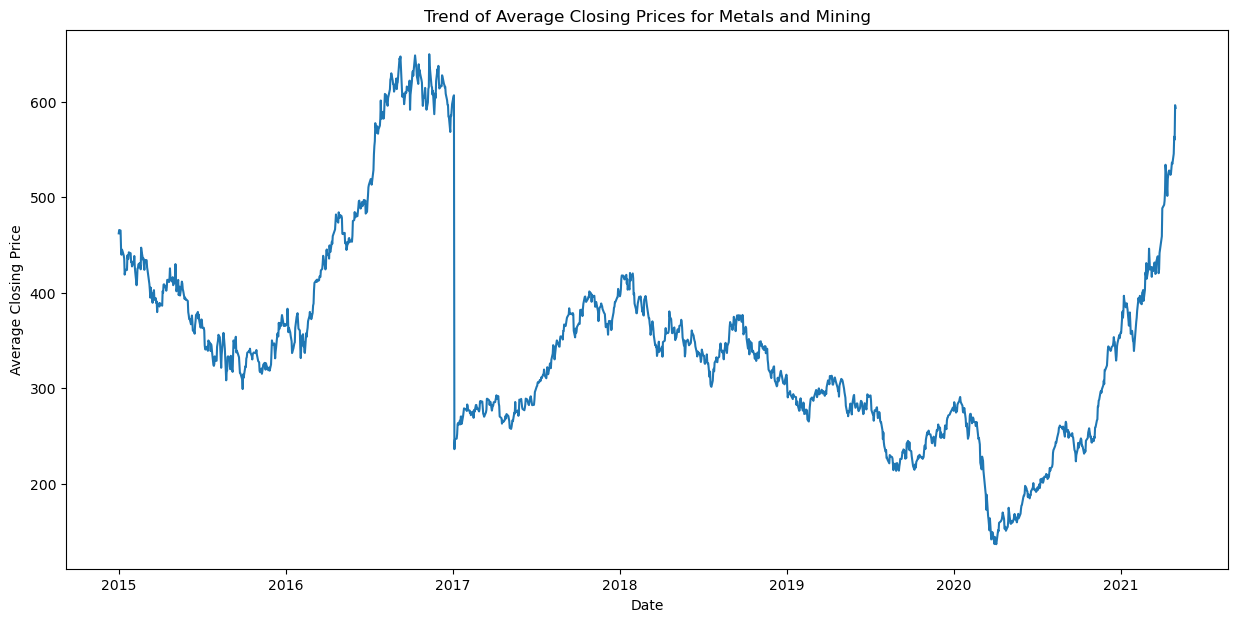

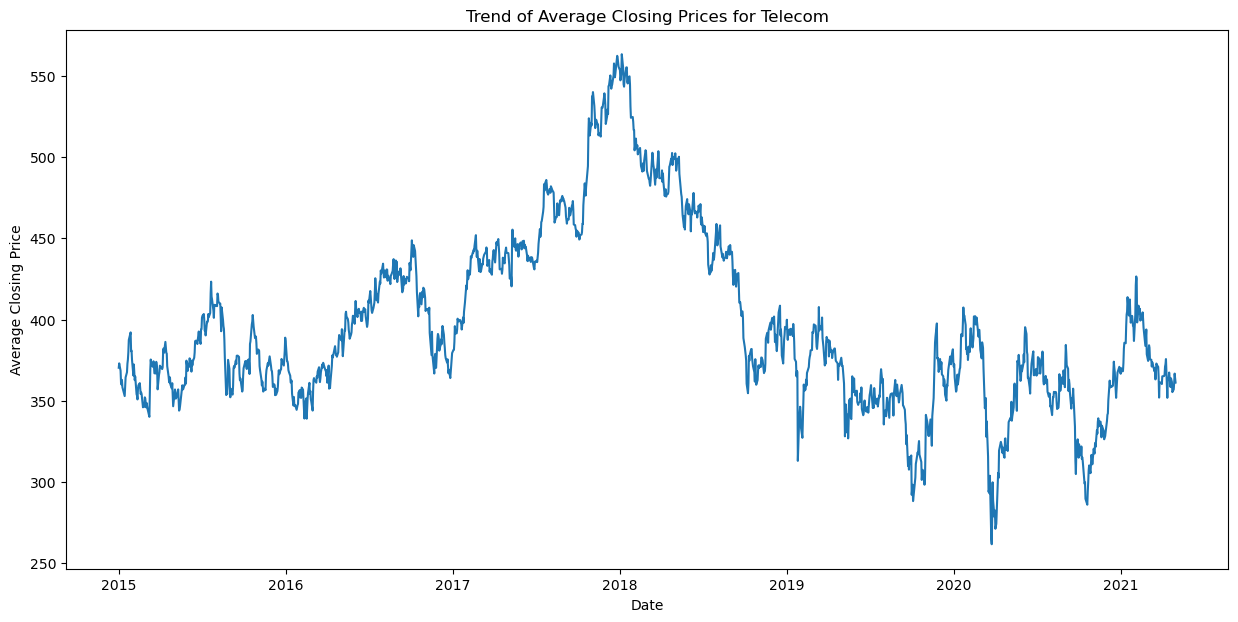

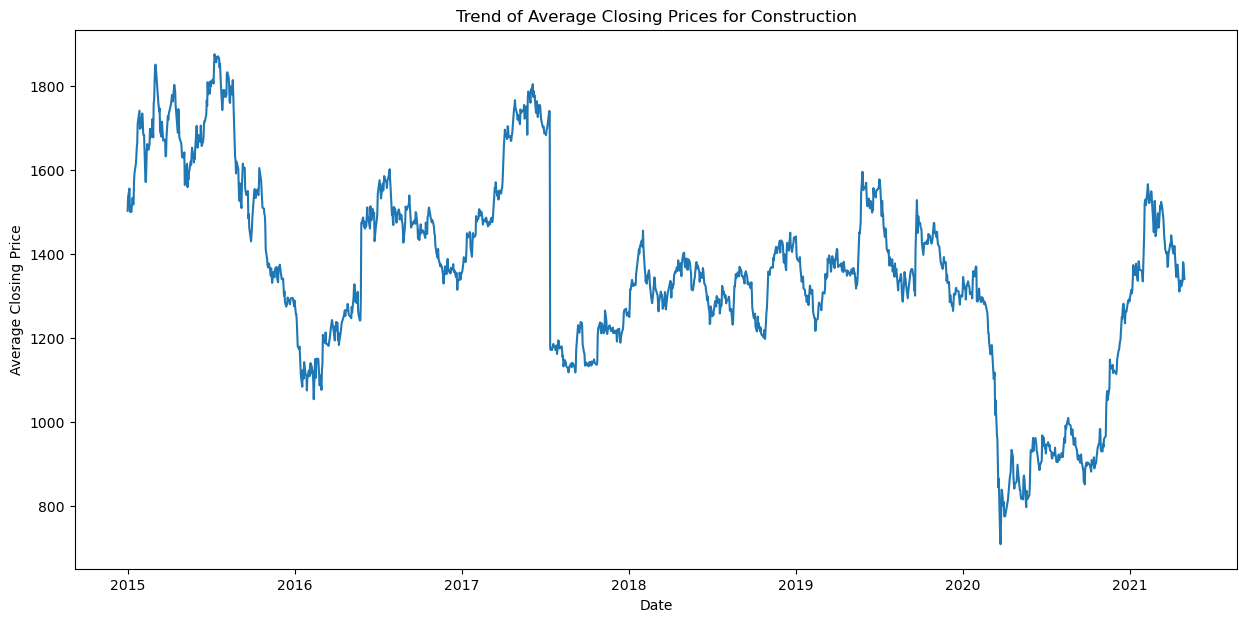

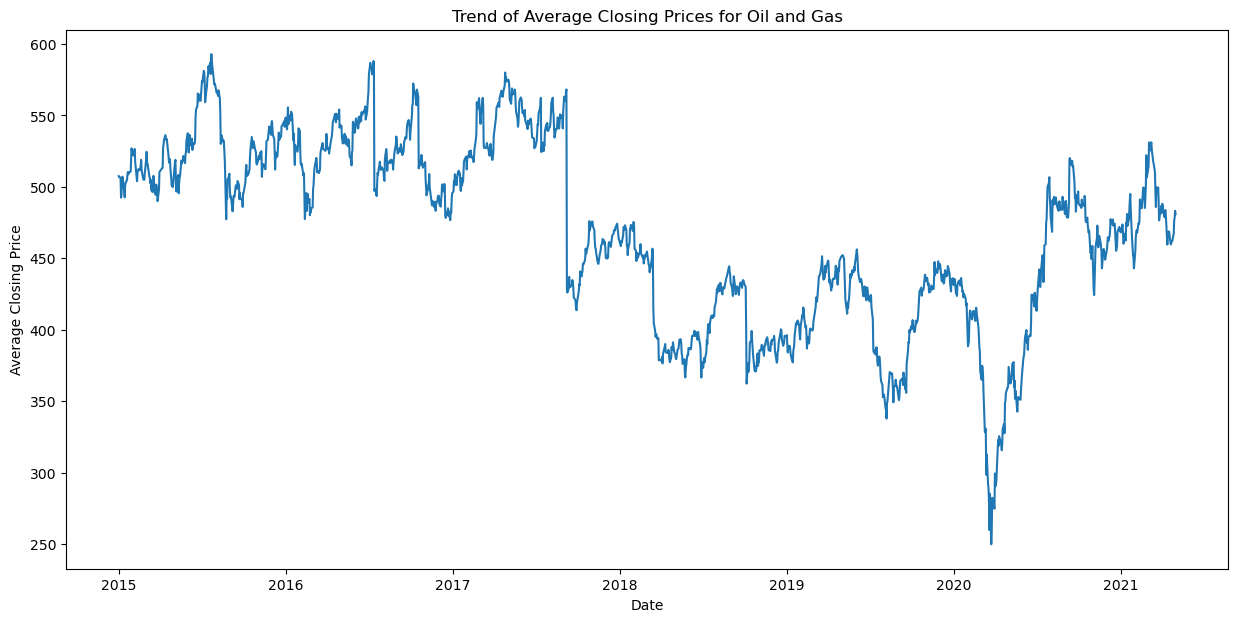

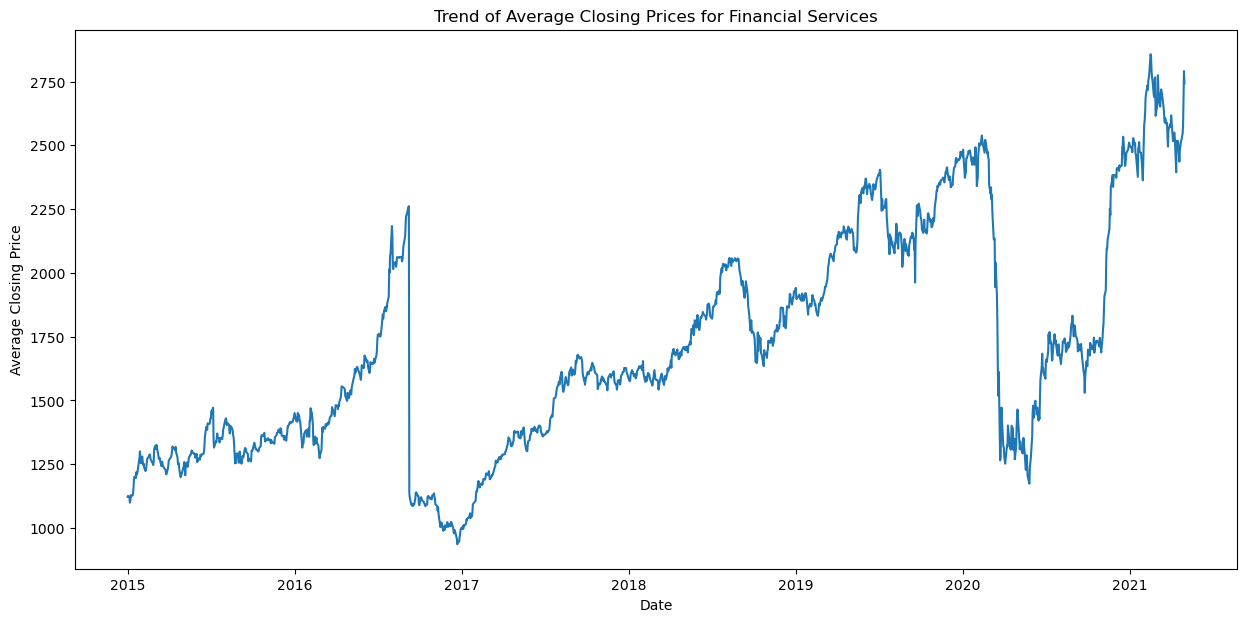

In [13]:
# Calculate average closing price per day for each sector
df['Date'] = pd.to_datetime(df['Date'])
avg_close_by_date_sector = df.groupby(['Date', 'Sector'])['Close'].mean().reset_index()

# Plot trend for each sector
for sector in sectors:
    sector_data = avg_close_by_date_sector[avg_close_by_date_sector['Sector'] == sector]
    plt.figure(figsize=(15, 7))
    plt.plot(sector_data['Date'], sector_data['Close'])
    plt.title(f'Trend of Average Closing Prices for {sector}')
    plt.xlabel('Date')
    plt.ylabel('Average Closing Price')
    plt.show()

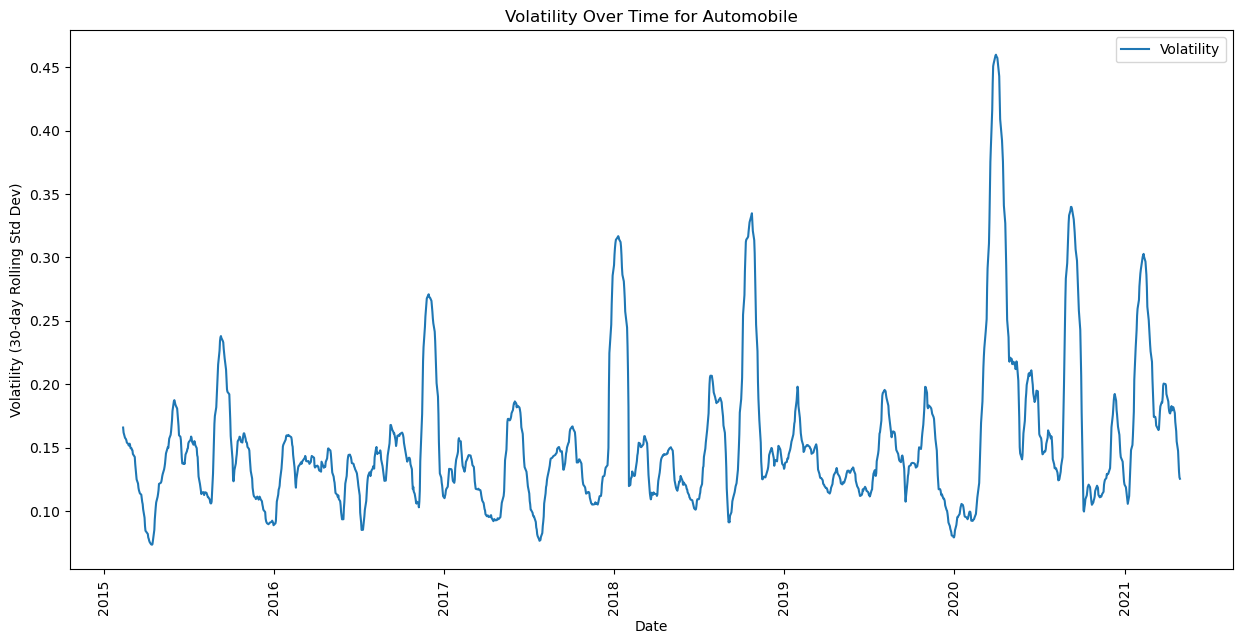

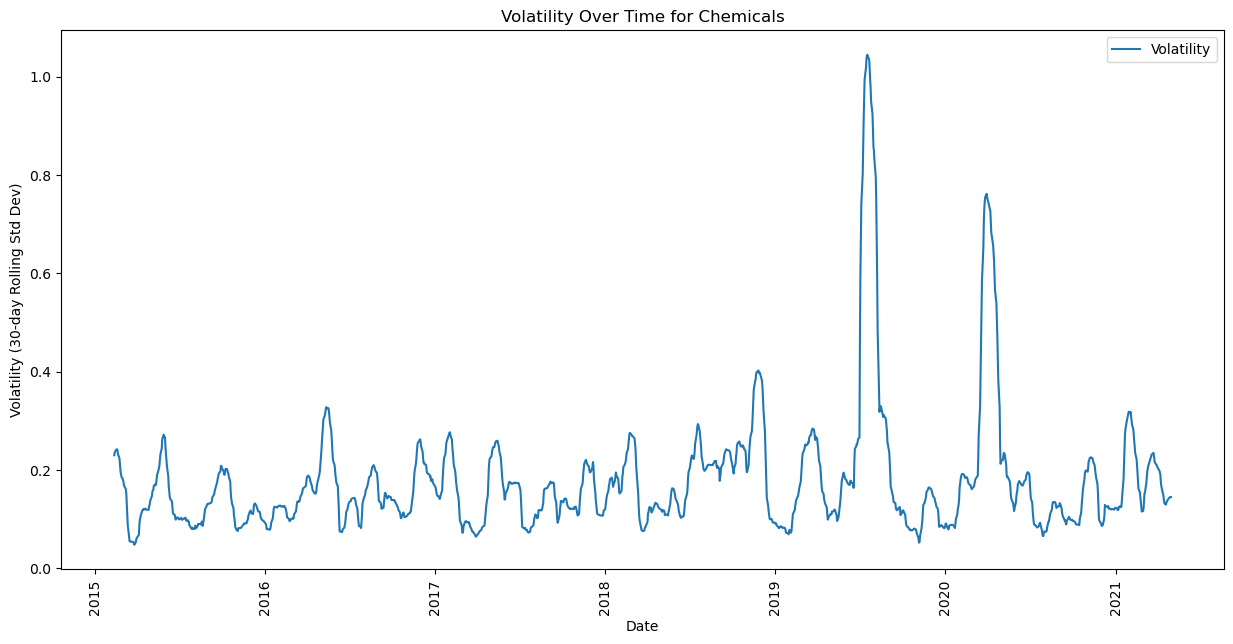

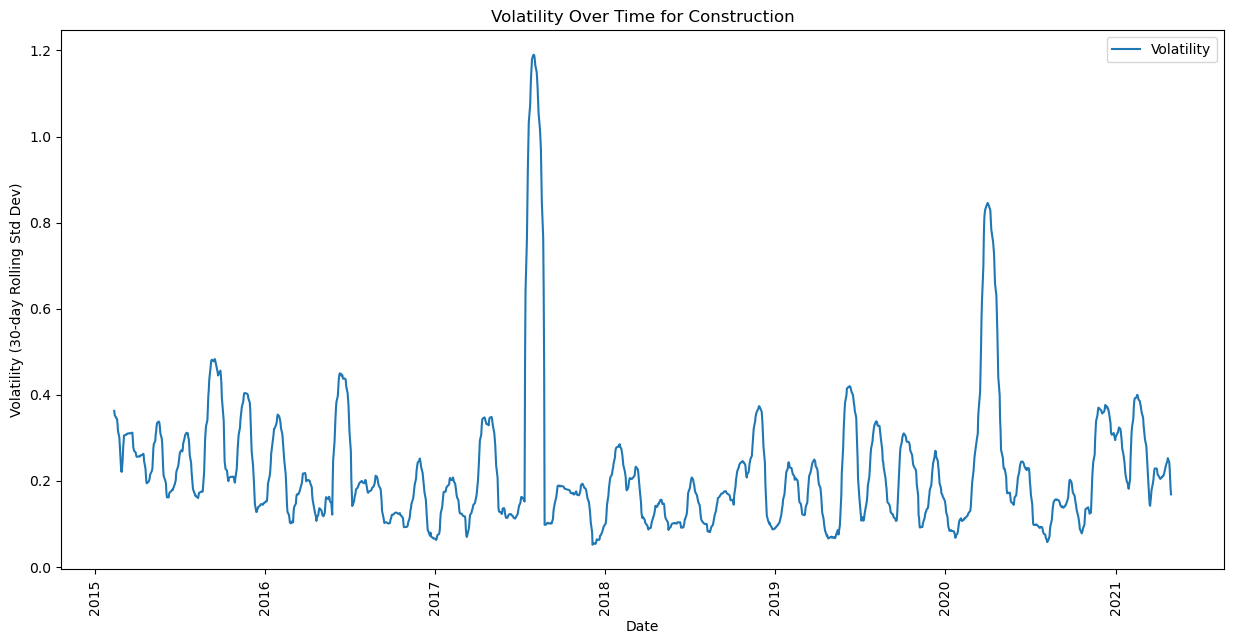

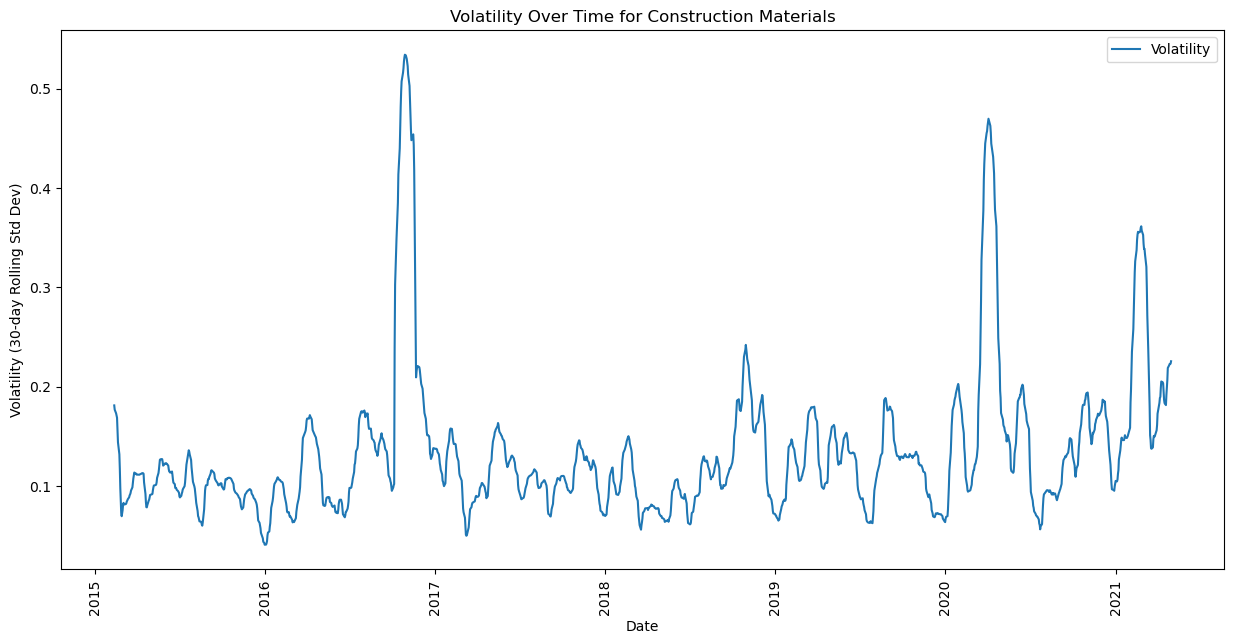

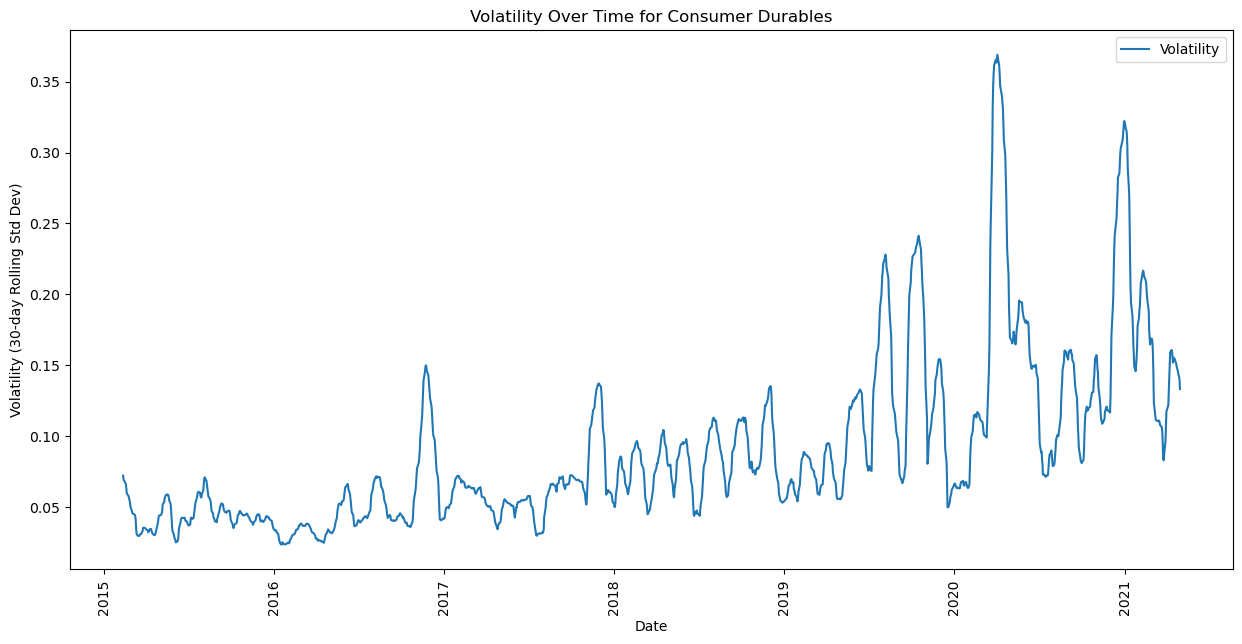

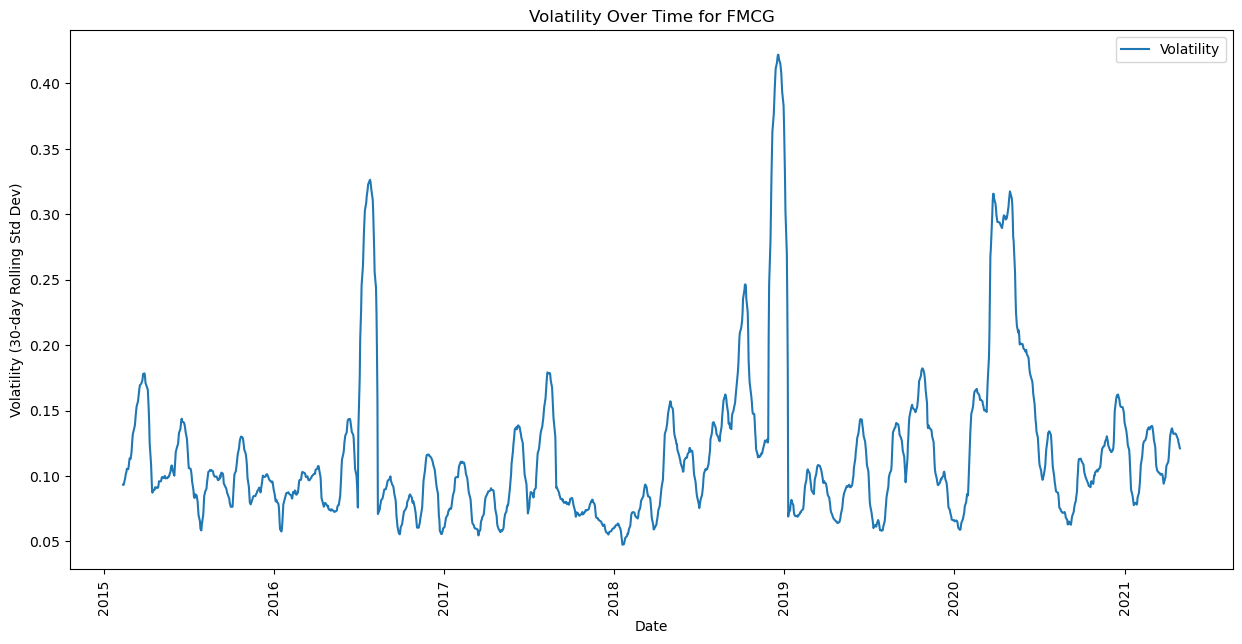

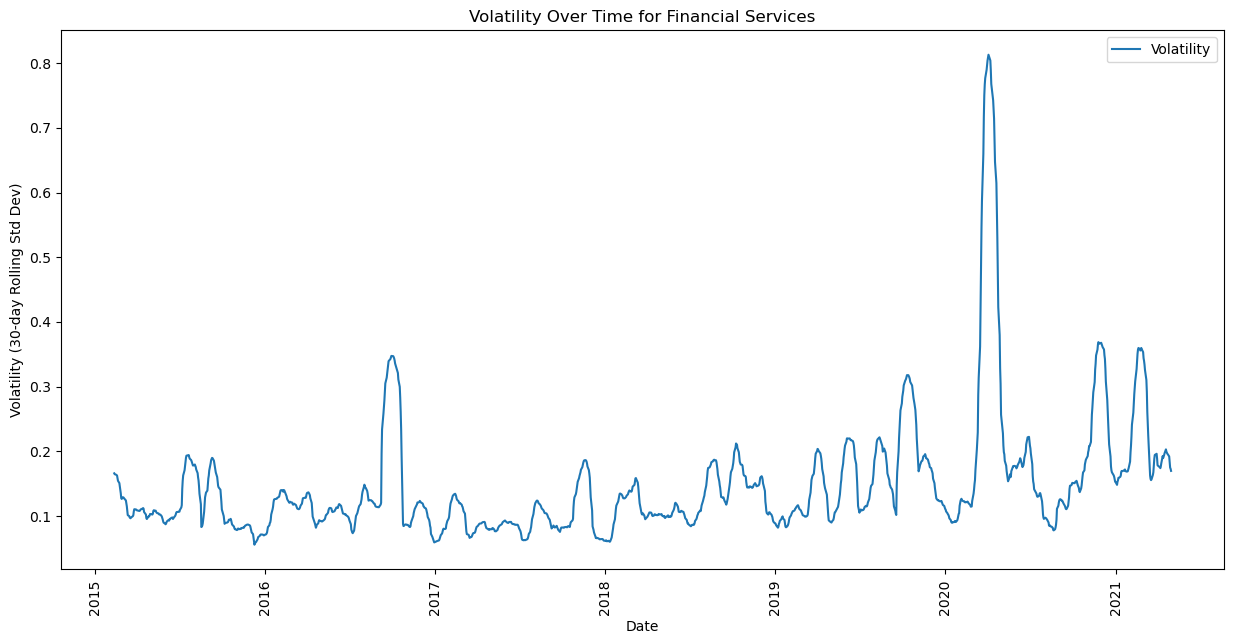

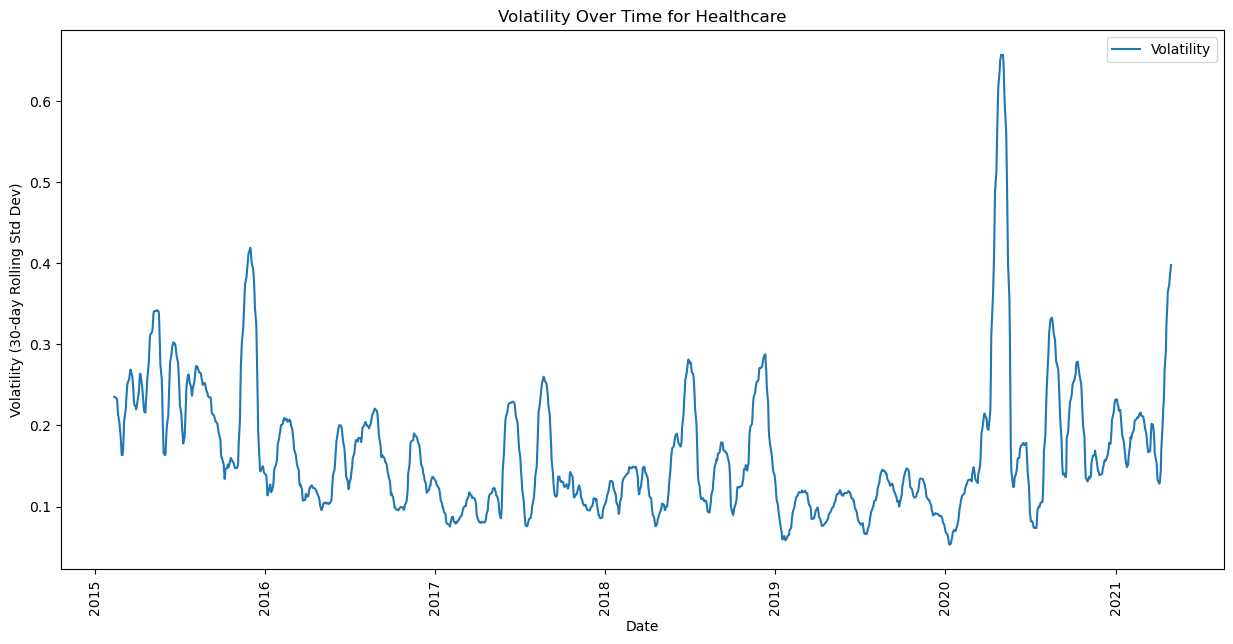

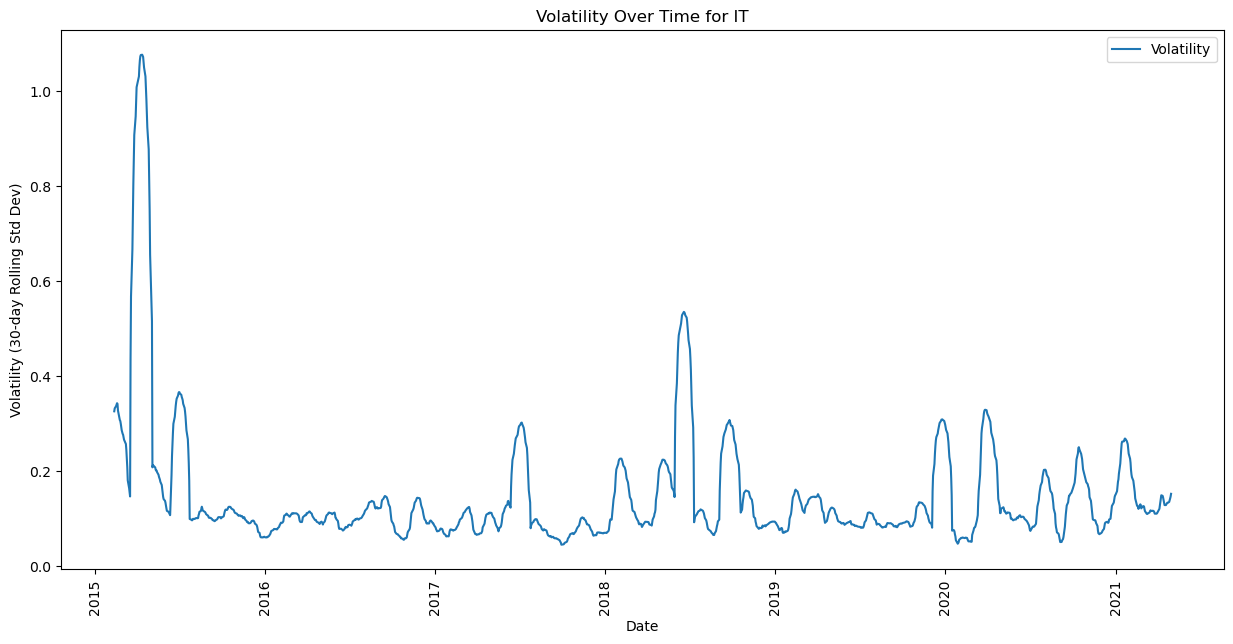

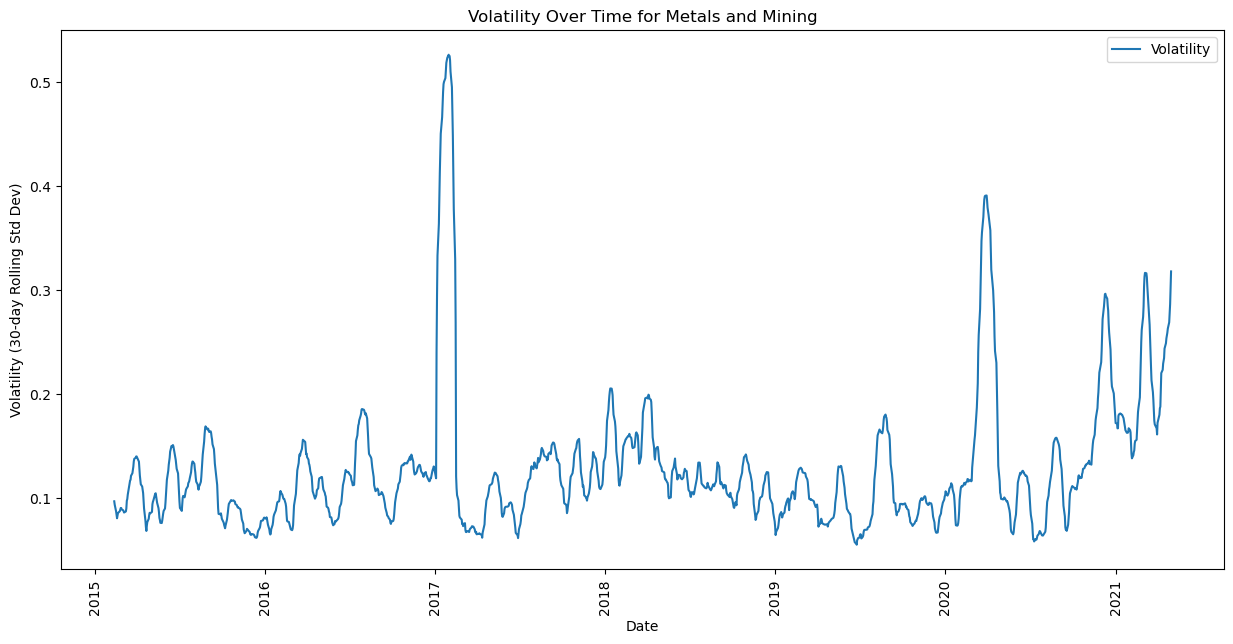

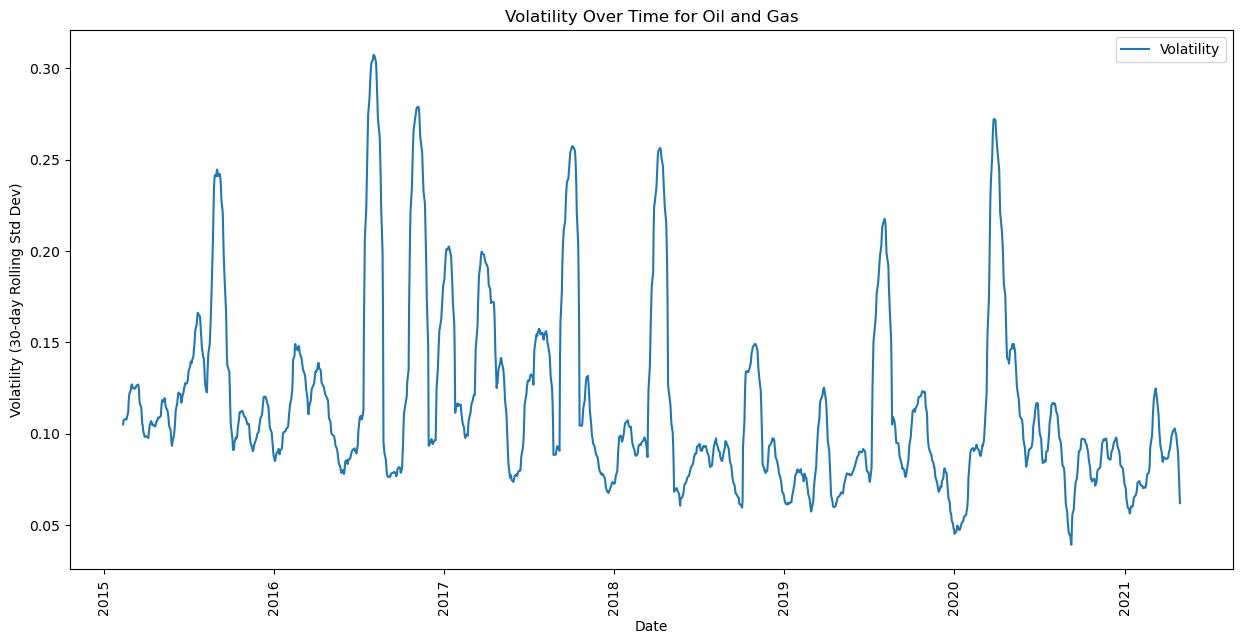

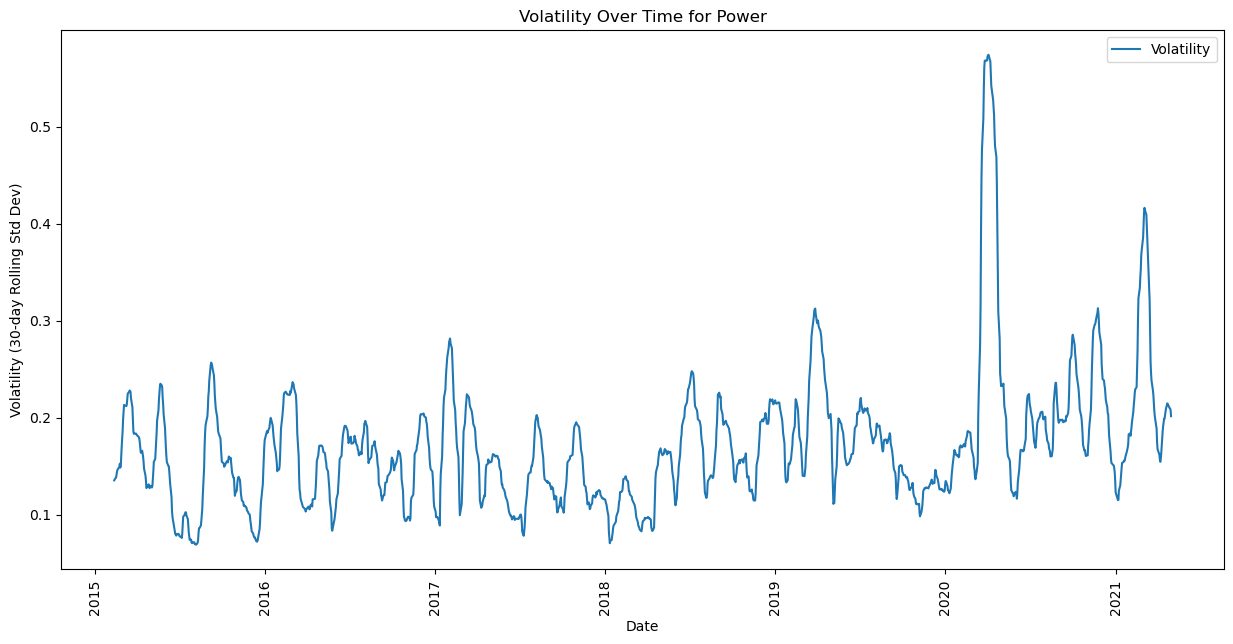

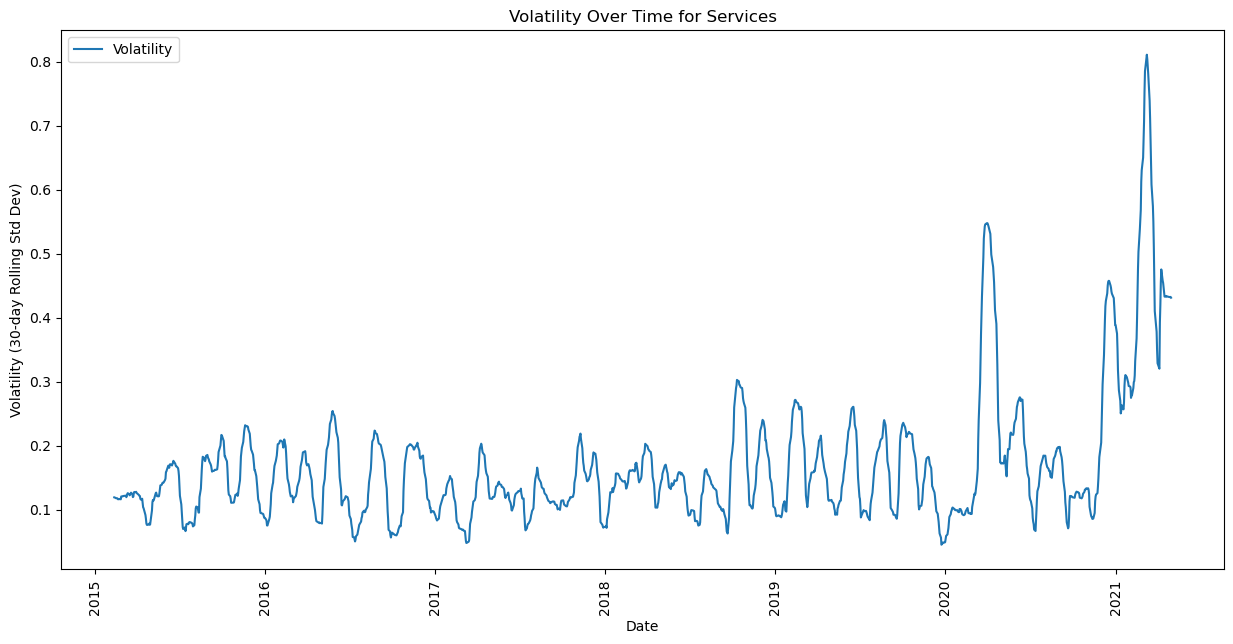

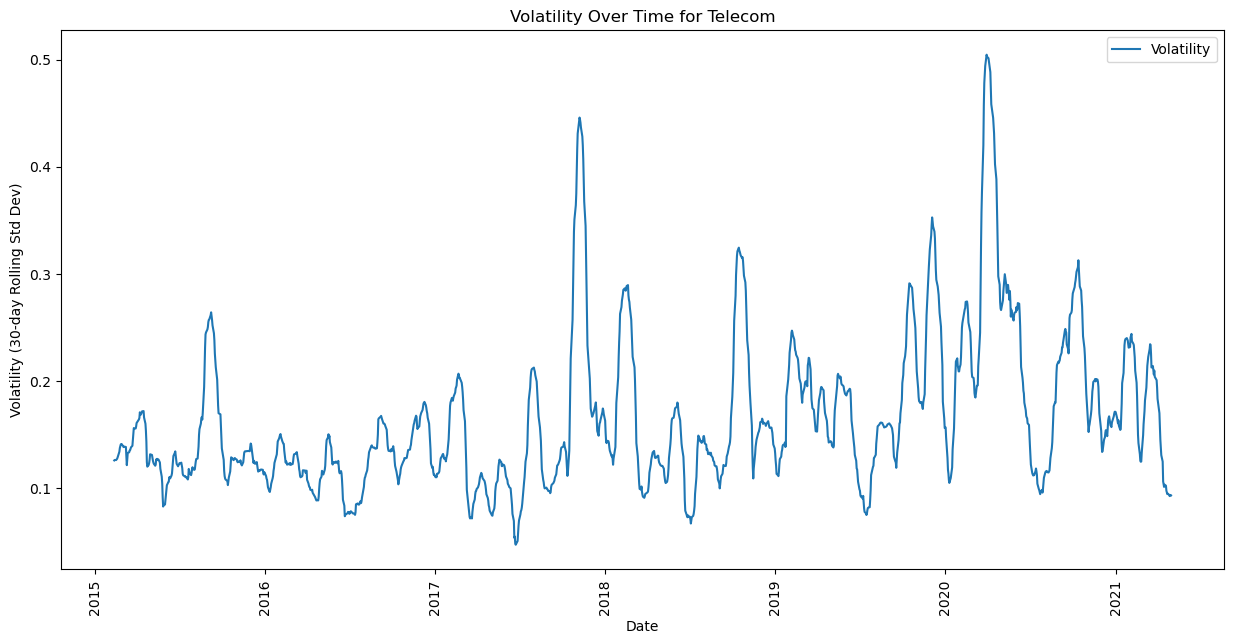

In [14]:
# Standardize the closing prices within each stock
df['Standardized_Close'] = df.groupby('Symbol')['Close'].transform(lambda x: (x - x.mean()) / x.std())

# Calculate rolling volatility (30-day rolling standard deviation) for each stock
df['Rolling_Volatility'] = df.groupby('Symbol')['Standardized_Close'].transform(lambda x: x.rolling(window=30).std())

# Aggregate the volatility for each sector by taking the mean of the volatilities of all stocks within that sector
sector_volatility = df.groupby(['Date', 'Sector'])['Rolling_Volatility'].mean().reset_index()

# Plot the aggregated volatility over time for each sector
sectors = sector_volatility['Sector'].unique()
for sector in sectors:
    sector_data = sector_volatility[sector_volatility['Sector'] == sector]
    plt.figure(figsize=(15, 7))
    plt.plot(sector_data['Date'], sector_data['Rolling_Volatility'], label='Volatility')
    plt.xticks(rotation=90)
    plt.title(f'Volatility Over Time for {sector}')
    plt.xlabel('Date')
    plt.ylabel('Volatility (30-day Rolling Std Dev)')
    plt.legend()
    plt.show()

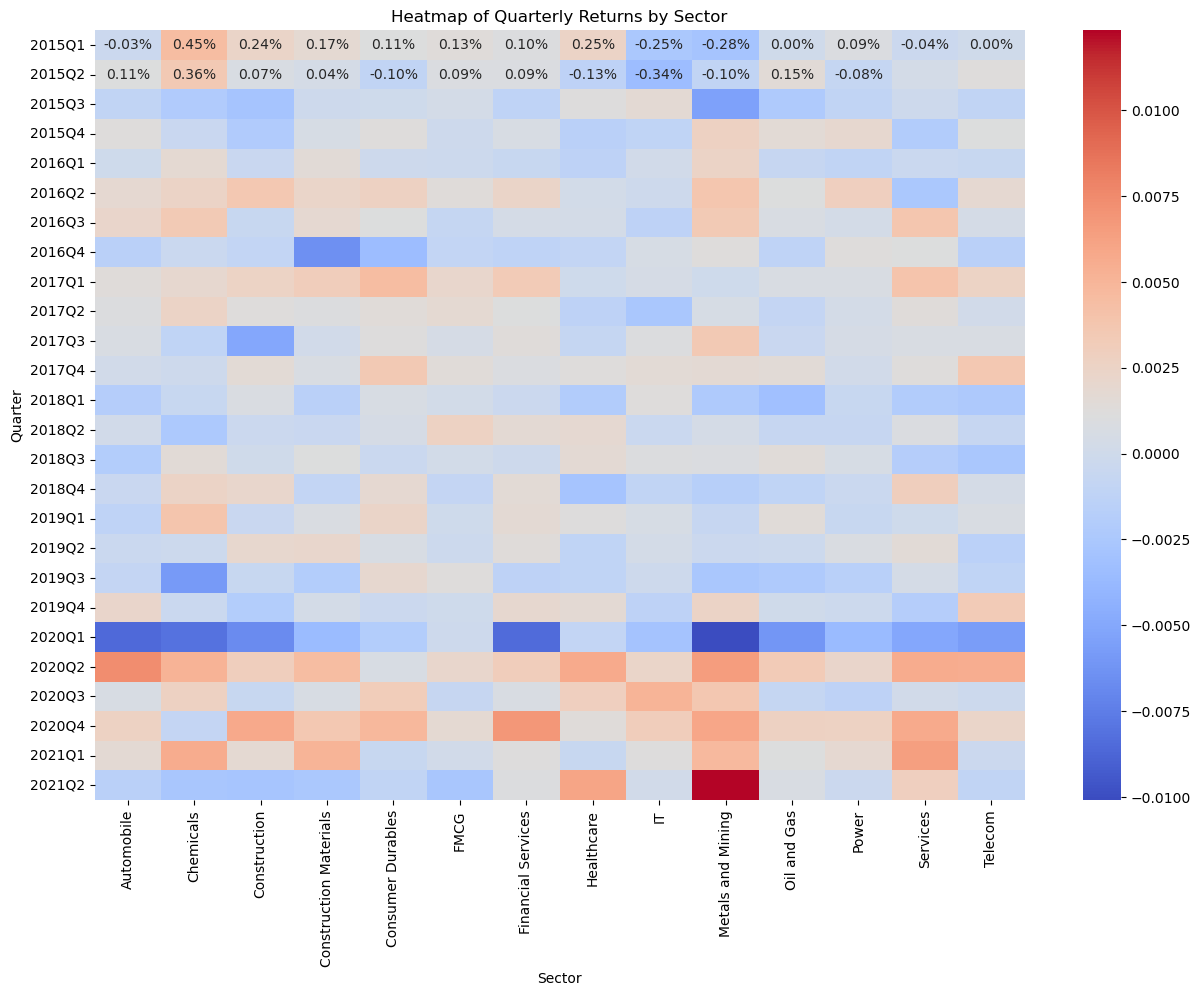

In [15]:
# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Resample to quarterly returns
df['Quarter'] = df.index.to_period('Q')
quarterly_returns = df.groupby(['Quarter', 'Sector'])['Return'].mean().reset_index()

# Pivot the data to create a matrix of average quarterly returns for each sector
quarterly_returns_pivot = quarterly_returns.pivot(index='Quarter', columns='Sector', values='Return')

# Plot the heatmap of average quarterly returns for each sector
plt.figure(figsize=(15, 10))
sns.heatmap(quarterly_returns_pivot, cmap='coolwarm', annot=True, fmt=".2%")
plt.title('Heatmap of Quarterly Returns by Sector')
plt.xlabel('Sector')
plt.ylabel('Quarter')
plt.show()